# **Capstone Project : Walmart Sales Study**
_____

### **Problem Statement 1:**

A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.

- You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following:

    - If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?
    - If the weekly sales show a seasonal trend, when and what could be the reason? 
    - Does temperature affect the weekly sales in any manner?
    - How is the Consumer Price index affecting the weekly sales of various stores?
    - Top performing stores according to the historical data.
    - The worst performing store, and how significant is the difference between the highest and lowest performing stores.

- Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

_____

In [100]:
# Importing necessary libraies
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb

In [101]:
# Importing dataset
df = pd.read_csv('Walmart DataSet.csv')
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [102]:
df.tail()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667

#### Exploratory Data Analysis

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Converting the date from object to datetime datatype

In [104]:
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [105]:
# Checking for null values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [106]:
# checking for duplicates
df.duplicated().sum()

0

**From initial observations it is clear that there are no null values present and there are no duplicates**

In [107]:
df['Store'].unique(), df['Store'].nunique()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64),
 45)

From the above observation it is clear that this dataset shows information tied to different stores and there are 45 such stores in total in this dataset.

**Lets us check the distribution of Weekly Sales (accros all stores)**

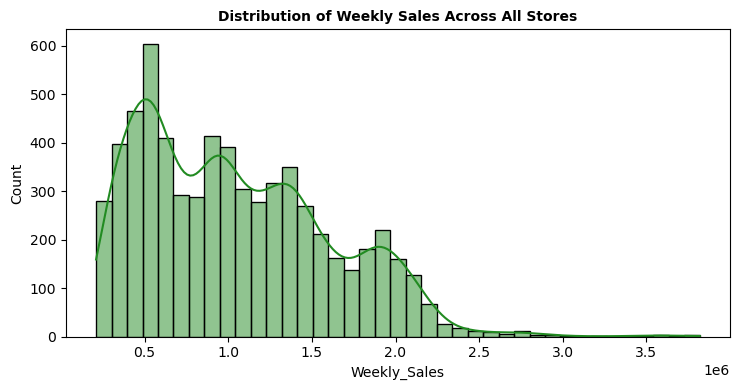

In [108]:
plt.figure(figsize=(7.5,4))
sb.histplot(df['Weekly_Sales'],kde=True,color='forestgreen')
plt.title('Distribution of Weekly Sales Across All Stores',fontweight='bold',fontsize=10)
plt.tight_layout()
plt.show()

**Let us check the distribution for few individual stores also**

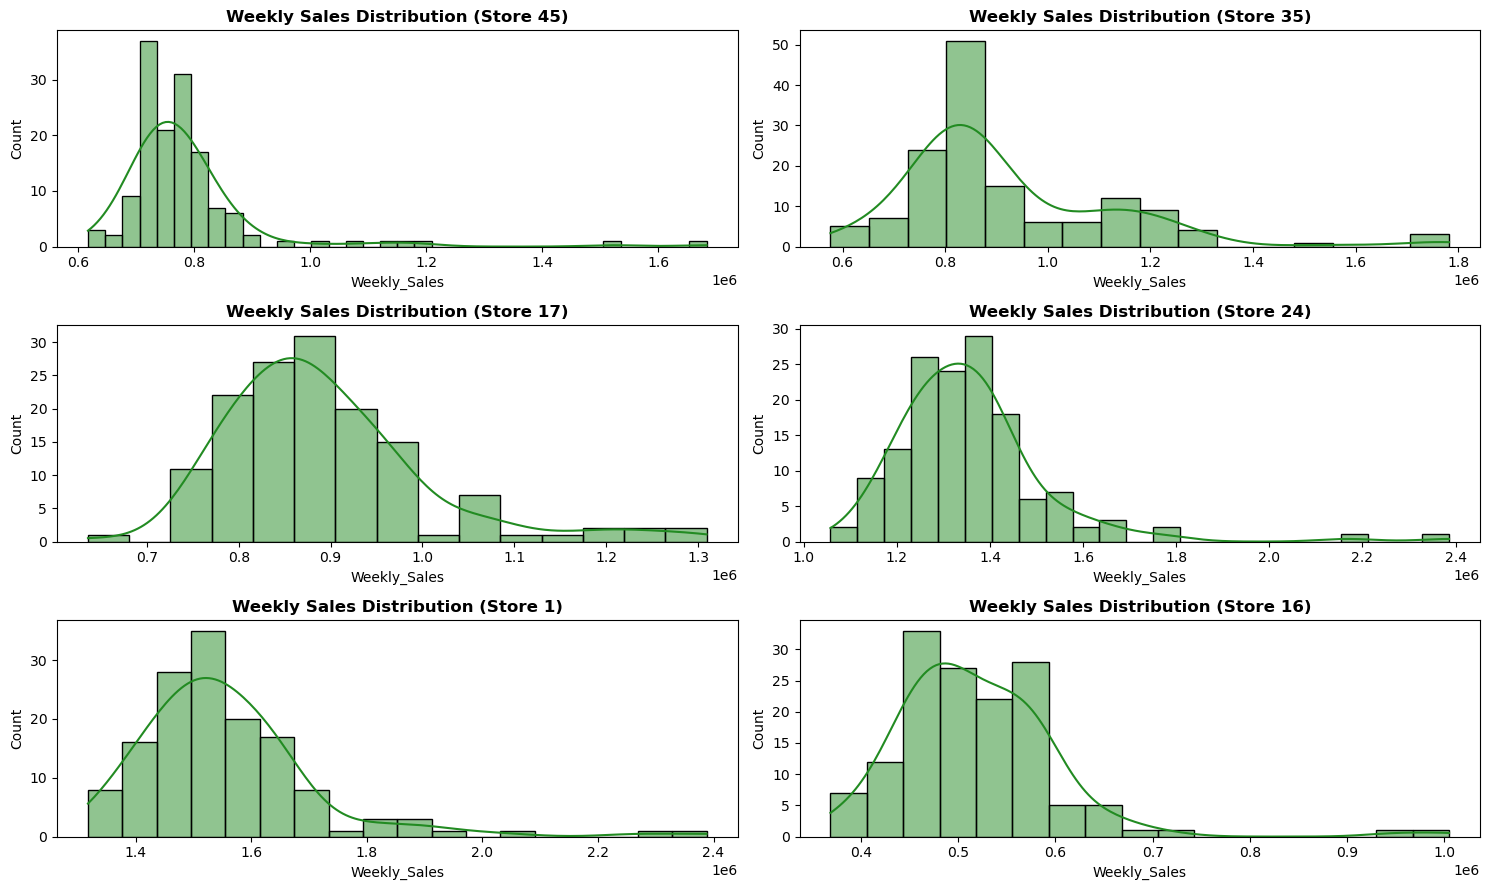

In [109]:
_ , axes = plt.subplots(3,2,figsize=(15,3*3))
axes = axes.flatten()

for i,store_num in enumerate(np.random.choice(range(1,46),size=6,replace=False)):
    sb.histplot(df[df['Store'] == store_num]['Weekly_Sales'], color='forestgreen', kde=True, ax=axes[i])
    axes[i].set_title(f'Weekly Sales Distribution (Store {store_num})',fontweight='bold')

plt.tight_layout()
plt.show()

In [110]:
df[['Weekly_Sales']].describe()

Weekly_Sales
count  6.435000e+03
mean   1.046965e+06
std    5.643666e+05
min    2.099862e+05
25%    5.533501e+05
50%    9.607460e+05
75%    1.420159e+06
max    3.818686e+06

**The analysis reveals considerable variation in the distribution of weekly sales among different stores. However, accross the entire dataset, the frequency of weekly sales is predominantly concentrated in the range of `$250,000` to `$2,000,000`.**

**Let us now check for outliers. We will do this with the mean of sales data which is grouped on dates as this considers overall sales patterns and identifies sales data that deviates significantly from the overall mean.**

In [111]:
grouped_data_by_dates = df.groupby('Date').mean().drop('Store',axis=1)
grouped_data_by_dates.head(5)

Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
Date                                                                          
2010-02-05  1.105572e+06           0.0    34.037333    2.717844  167.730885   
2010-02-12  1.074148e+06           1.0    34.151333    2.694022  167.825608   
2010-02-19  1.072822e+06           0.0    37.719778    2.672067  167.871686   
2010-02-26  9.770794e+05           0.0    39.243556    2.683933  167.909657   
2010-03-05  1.041588e+06           0.0    42.917333    2.731200  167.947628   

            Unemployment  
Date                      
2010-02-05      8.619311  
2010-02-12      8.619311  
2010-02-19      8.619311  
2010-02-26      8.619311  
2010-03-05      8.619311

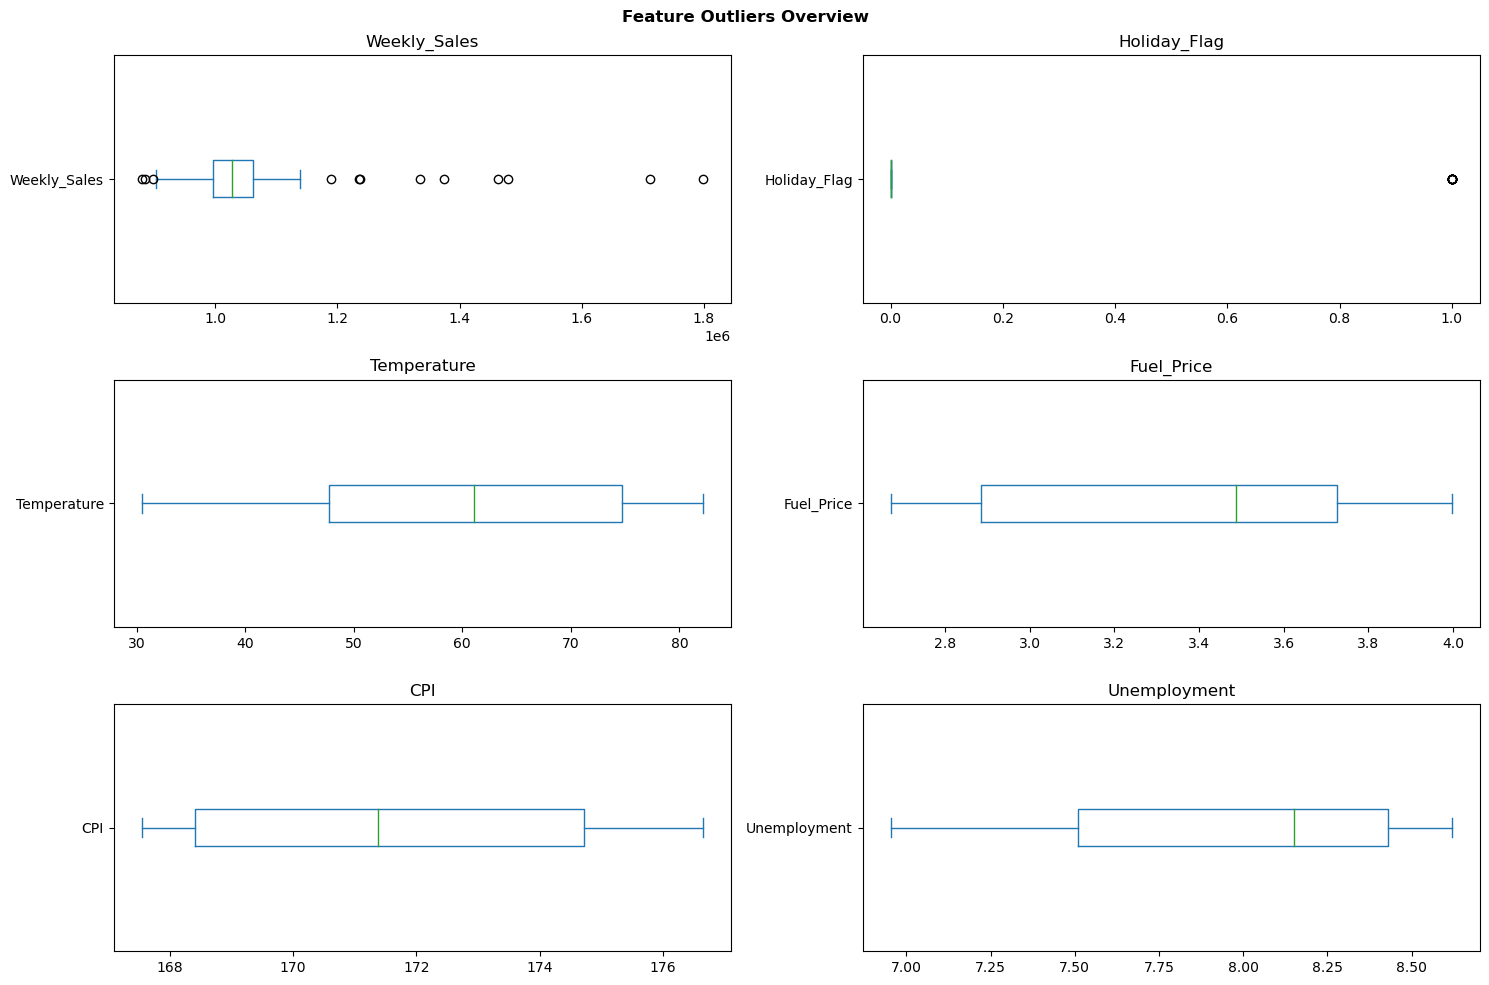

In [112]:
columns = grouped_data_by_dates.columns
_ , axes = plt.subplots(3,2,figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(columns):
    grouped_data_by_dates[feature].plot(kind='box', vert=False, ax=axes[i])
    axes[i].set_title(feature)

plt.suptitle('Feature Outliers Overview',fontweight='bold')
plt.tight_layout()
plt.show()

Here we will only consider the outliers in Weekly Sales for further analysis as Holiday_Flag is a categorical variable

**Let us plot the weekly sales with respect to time**

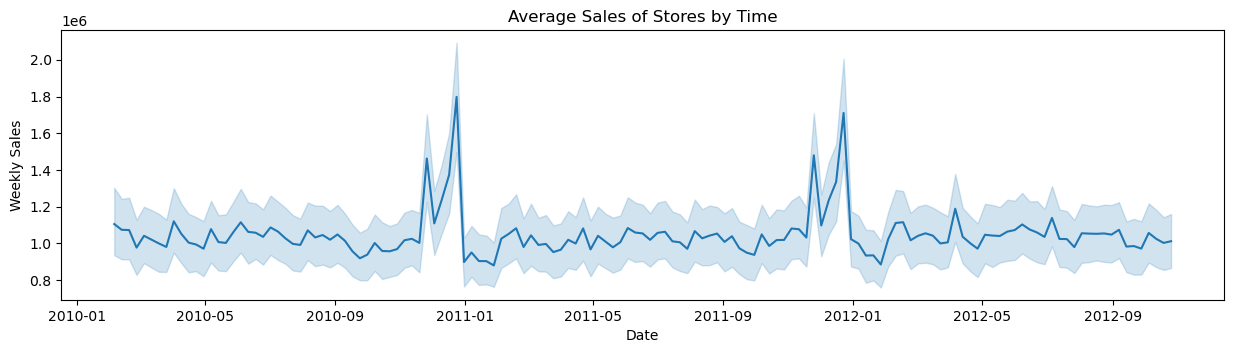

In [113]:
plt.figure(figsize=(15,3.5))
sb.lineplot(df,x='Date',y='Weekly_Sales',estimator='mean')
plt.title('Average Sales of Stores by Time')
plt.ylabel('Weekly Sales')
plt.show()

In [114]:
Q1,Q3 = grouped_data_by_dates['Weekly_Sales'].quantile([0.25,0.75])
IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR); upper = Q3 + (1.5 * IQR)
outliers = (grouped_data_by_dates['Weekly_Sales'] < lower) | (grouped_data_by_dates['Weekly_Sales'] > upper)
outlier_data = grouped_data_by_dates[outliers]
outlier_data.shape

(12, 6)

In [115]:
# Removing the outliers
df_no_outliers = df[['Date','Weekly_Sales']][~df['Date'].isin(grouped_data_by_dates[outliers].index)]

**Let's plot the weekly sales with respect to time again, now that the outliers have been removed.**

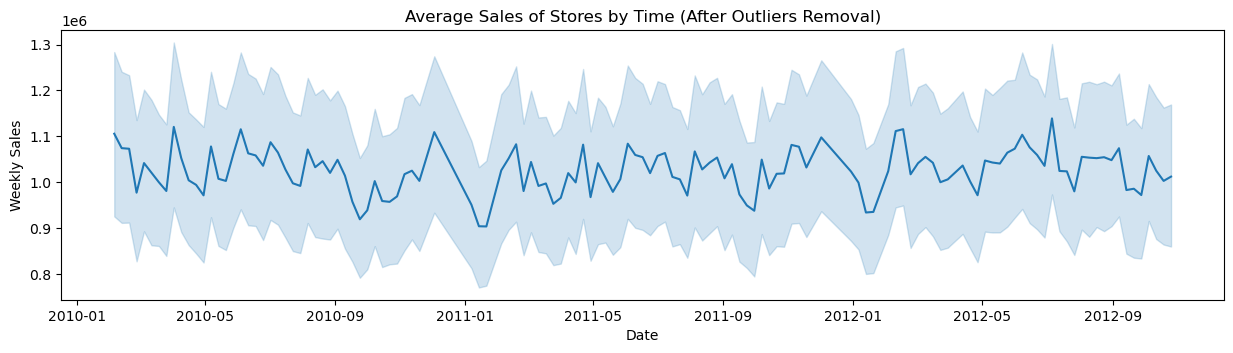

In [116]:
plt.figure(figsize=(15,3.5))
sb.lineplot(df_no_outliers,x='Date',y='Weekly_Sales',estimator='mean')
plt.title('Average Sales of Stores by Time (After Outliers Removal)')
plt.ylabel('Weekly Sales')
plt.show()

**From the above plots, it is evident that removing outliers in our dataset would result in the loss of crucial sales data, and since they also reveal information about the seasonal aspect of this data, we will not be removing these data points.**

<center>  ------------------------------------------------------------------------------------------------------------------------------ </center>

#### a) If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

Since data is provided for 45 different stores of walmart. Lets create a separate dataframe for each store and we will store each of these dataframes in a dictionary for easy access

In [117]:
store = {key:df[df['Store'] == key].set_index('Store') for key in range(1,46)}
store[1].head(3)

Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Store                                                                   
1     2010-02-05    1643690.90             0        42.31       2.572   
1     2010-02-12    1641957.44             1        38.51       2.548   
1     2010-02-19    1611968.17             0        39.93       2.514   

              CPI  Unemployment  
Store                            
1      211.096358         8.106  
1      211.242170         8.106  
1      211.289143         8.106

In [118]:
store[45].head(3)

Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Store                                                                   
45    2010-02-05     890689.51             0        27.31       2.784   
45    2010-02-12     656988.64             1        27.73       2.773   
45    2010-02-19     841264.04             0        31.27       2.745   

              CPI  Unemployment  
Store                            
45     181.871190         8.992  
45     181.982317         8.992  
45     182.034782         8.992

In [119]:
# grouping by store
grouped = df.groupby('Store')
grouped

**Lets find the correlation of weekly sales with the rest of the features on each store level**

In [120]:
correations = {}
for i in store.keys():
    correations[i] = store[i].corrwith(store[i]['Weekly_Sales'],numeric_only=True)

In [121]:
correations

{1: Weekly_Sales    1.000000
 Holiday_Flag    0.194905
 Temperature    -0.222701
 Fuel_Price      0.124592
 CPI             0.225408
 Unemployment   -0.097955
 dtype: float64,
 2: Weekly_Sales    1.000000
 Holiday_Flag    0.177726
 Temperature    -0.297673
 Fuel_Price     -0.196375
 CPI            -0.062431
 Unemployment    0.066325
 dtype: float64,
 3: Weekly_Sales    1.000000
 Holiday_Flag    0.208556
 Temperature    -0.377524
 Fuel_Price      0.140886
 CPI             0.317250
 Unemployment   -0.230413
 dtype: float64,
 4: Weekly_Sales    1.000000
 Holiday_Flag    0.153388
 Temperature    -0.225583
 Fuel_Price      0.211549
 CPI             0.351157
 Unemployment   -0.337015
 dtype: float64,
 5: Weekly_Sales    1.000000
 Holiday_Flag    0.302525
 Temperature    -0.175517
 Fuel_Price      0.167352
 CPI             0.308261
 Unemployment   -0.207043
 dtype: float64,
 6: Weekly_Sales    1.000000
 Holiday_Flag    0.150424
 Temperature    -0.084863
 Fuel_Price     -0.103356
 CPI         

**Getting the correlation of Weekly sales with Unemployment feature alone for each store**

In [122]:
corr_unemployment = {}
for i in store.keys():
    corr_unemployment[i] = store[i].corrwith(store[i]['Weekly_Sales'],numeric_only=True)['Unemployment']

In [123]:
# Sorting correlation between Unemployment and Weekly Sales from negative correlation to positive correlation
corr_unemployment = dict(sorted(corr_unemployment.items(), key=lambda x:x[1], reverse=False))
corr_unemployment

{38: -0.7852902748572028,
 44: -0.7800764432910237,
 39: -0.38468135708616064,
 42: -0.3563546441574805,
 41: -0.3506296095634573,
 4: -0.3370151956445587,
 17: -0.26359968183073906,
 3: -0.2304130134863526,
 37: -0.22128669565468617,
 5: -0.20704271031605842,
 43: -0.20195435737205705,
 9: -0.1915343637022839,
 13: -0.1716328688963503,
 7: -0.16538168270129636,
 40: -0.11252795058812329,
 32: -0.09945467124759011,
 1: -0.0979553947295795,
 20: -0.09534134450284637,
 23: -0.07716899559088829,
 16: -0.07086358405192238,
 26: -0.06689910263473302,
 31: -0.06473780907548937,
 8: -0.05257964619712677,
 11: -0.020338971133082306,
 27: -0.0142750519412613,
 24: -0.012260801238922888,
 12: -0.009286099902746538,
 25: -0.004957651760361549,
 45: -0.004041028359856243,
 34: 0.01701025065278913,
 22: 0.039042867355347455,
 6: 0.044250821015624046,
 2: 0.06632485967770846,
 15: 0.0789053686051426,
 29: 0.08468168200648409,
 33: 0.10117473193757327,
 19: 0.10146392090273439,
 10: 0.131907622077460

In [124]:
len([value for key,value in corr_unemployment.items() if value < 0])
# These are the number of stores where Unemployment is negatively correlated with Weekly Sales

29

In [125]:
print(f'The stores that are adversly affected by Unemployment factors are: \n'
            f'{", ".join([str(key) for key, value in corr_unemployment.items() if value < 0])}')

The stores that are adversly affected by Unemployment factors are: 
38, 44, 39, 42, 41, 4, 17, 3, 37, 5, 43, 9, 13, 7, 40, 32, 1, 20, 23, 16, 26, 31, 8, 11, 27, 24, 12, 25, 45


In [126]:
len([value for key,value in corr_unemployment.items() if value > 0])
# These are the number of stores where Unemployment is positively correlated with Weekly Sales

16

In [127]:
print(f'The stores, whose sales were not adversely affected by Unemployment factors are: \n'
            f'{", ".join([str(key) for key, value in corr_unemployment.items() if value > 0])}')

The stores, whose sales were not adversely affected by Unemployment factors are: 
34, 22, 6, 2, 15, 29, 33, 19, 10, 28, 18, 30, 14, 21, 35, 36


**As seen from the above outputs on individual store level, the Weekly Sales of 29 stores out of 45 are negatively correlated with unemployment and 16 are positively correlated with unemployment. Let us visualize this below.**

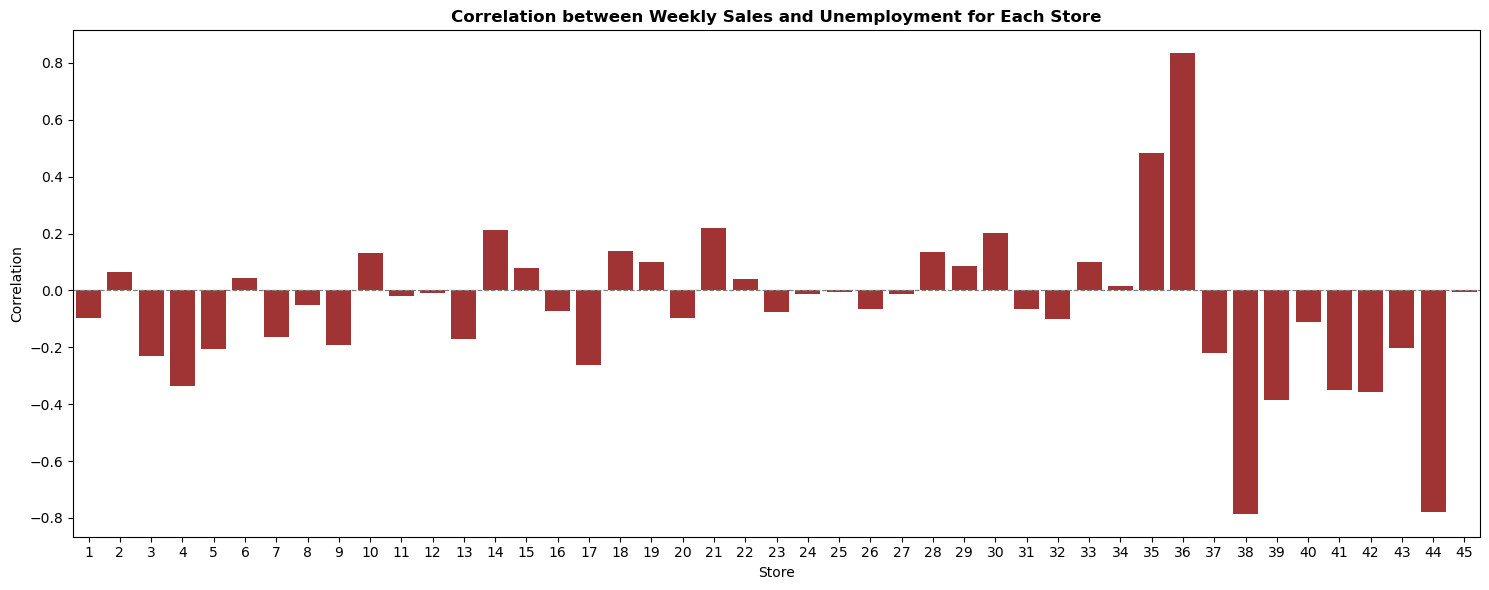

In [128]:
plt.figure(figsize=(15,6))
sb.barplot(x=corr_unemployment.keys(), y=corr_unemployment.values(), color='firebrick')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.9)
plt.title('Correlation between Weekly Sales and Unemployment for Each Store',fontweight='bold')
plt.xlabel('Store')
plt.ylabel('Correlation')
plt.tight_layout()
plt.show()

**Store 38 is the store where Unemployment is most negatively correlated (-0.79) with Weekly Sales and Store 36 is the store where it is most positively correlated (0.83)**

Lets us briefly see the statistics of these 2 stores

In [129]:
store[38].describe().iloc[:,1:]

Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
count     143.000000    143.000000   143.000000  143.000000  143.000000   
mean   385731.653287      0.069930    70.262797    3.606420  128.679669   
min    303908.810000      0.000000    37.640000    2.825000  126.064000   
25%    350365.655000      0.000000    53.985000    3.125000  126.590094   
50%    380870.090000      0.000000    68.660000    3.705000  129.075677   
75%    414198.140000      0.000000    85.425000    3.966000  130.502414   
max    499267.660000      1.000000    99.220000    4.468000  131.193097   
std     42768.169450      0.255926    16.630317    0.447926    1.858300   

       Unemployment  
count    143.000000  
mean      13.116483  
min       10.199000  
25%       12.187000  
50%       13.736000  
75%       14.099000  
max       14.313000  
std        1.208114

In [130]:
store[36].describe().iloc[:,1:]

Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
count     143.000000    143.000000   143.000000  143.000000  143.000000   
mean   373511.992797      0.069930    71.160350    3.204203  214.729069   
min    270677.980000      0.000000    41.160000    2.472000  209.118536   
25%    320540.030000      0.000000    62.465000    2.725000  210.312937   
50%    373267.580000      0.000000    73.570000    3.275000  214.192157   
75%    426489.915000      0.000000    81.805000    3.572500  219.219647   
max    489372.020000      1.000000    87.640000    3.934000  222.113657   
std     60725.173579      0.255926    12.094075    0.447337    4.315290   

       Unemployment  
count    143.000000  
mean       7.869049  
min        6.228000  
25%        7.244000  
50%        8.300000  
75%        8.395000  
max        8.554000  
std        0.702688

Comparing the statistics of store 36 and store 38, we observe that the **Unemployment mean and standard deviation in store 36 are nearly half of those in store 38.**

**Visualizing the relation between the features for the above 2 stores**

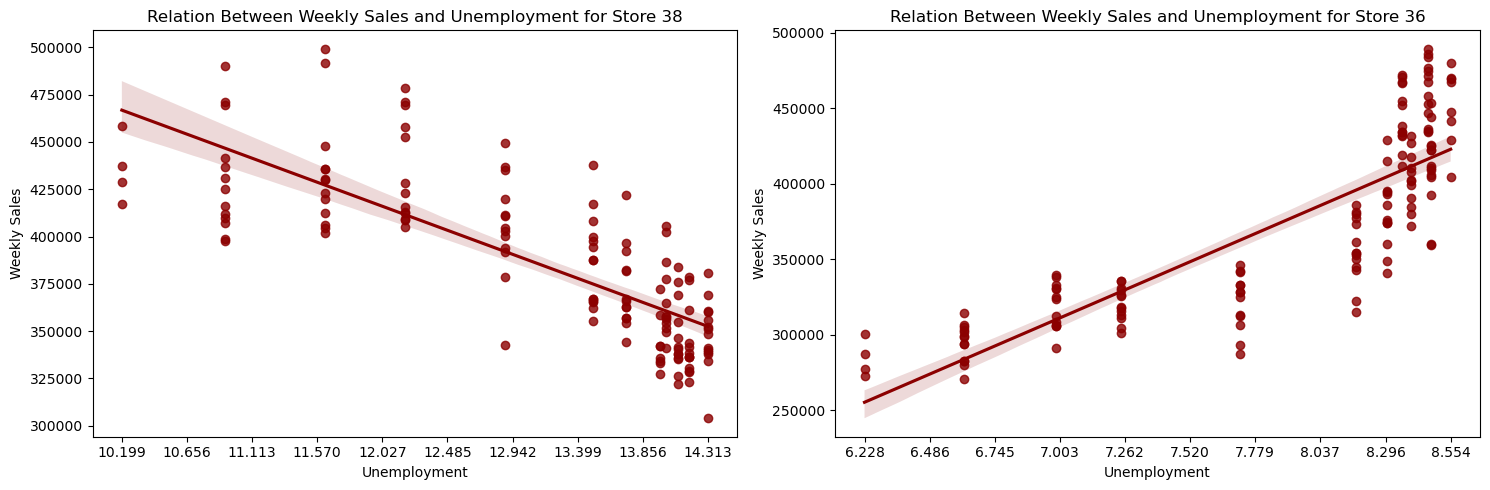

In [131]:
_, axes = plt.subplots(1,2,figsize=(2*7.5,1*5))
for ax,i in enumerate([38,36]):
    sb.regplot(y=store[i]['Weekly_Sales'],x=store[i]['Unemployment'],color='darkred',ax=axes[ax])
    axes[ax].set_xlabel('Unemployment')
    axes[ax].set_ylabel('Weekly Sales')
    axes[ax].set_title(f'Relation Between Weekly Sales and Unemployment for Store {i}')
    axes[ax].set_xticks(np.linspace(store[i]['Unemployment'].min(), store[i]['Unemployment'].max(), 10))
plt.tight_layout()
plt.show()

**Now let us find the overall correlation between Weekly Sales and Unemployment**

In [132]:
# For doing this we will take the mean values of each features per store
corr_store_means = grouped.mean(numeric_only=True).drop('Holiday_Flag',axis=1).corr(numeric_only=True)
corr_store_means

Weekly_Sales  Temperature  Fuel_Price       CPI  Unemployment
Weekly_Sales      1.000000    -0.076388    0.067734 -0.076569     -0.112281
Temperature      -0.076388     1.000000   -0.091717  0.318602      0.273267
Fuel_Price        0.067734    -0.091717    1.000000 -0.717644      0.475419
CPI              -0.076569     0.318602   -0.717644  1.000000     -0.301925
Unemployment     -0.112281     0.273267    0.475419 -0.301925      1.000000

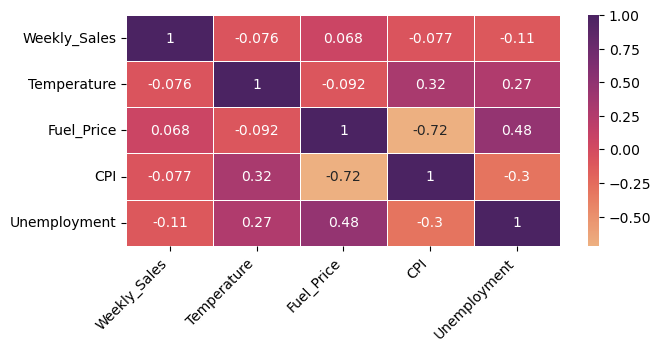

In [133]:
# Heatmap of correlation of store means
plt.figure(figsize=(7,3))
sb.heatmap(corr_store_means,annot=True,cmap='flare',linewidth=0.65)
plt.xticks(rotation=45,ha='right')
plt.show()

**Let us now visulize the overall relation between Weekly Sales and Unemployment for all the stores using a regplot**

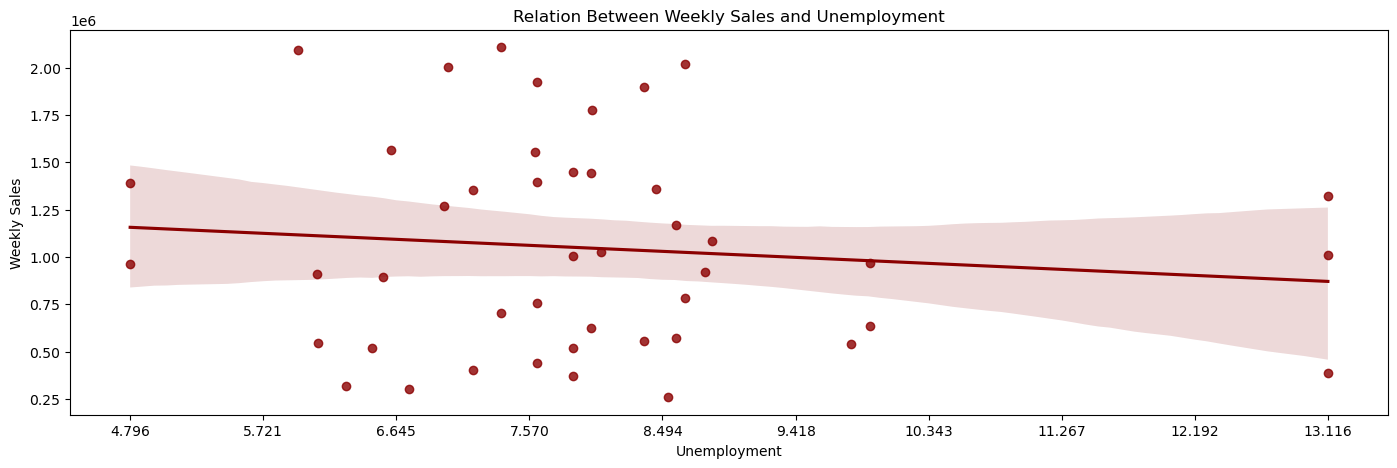

In [134]:
x = [store[i]['Unemployment'].mean() for i in range(1,46)]
y = [store[i]['Weekly_Sales'].mean() for i in range(1,46)]

plt.figure(figsize=(17,5))
sb.regplot(x=x,y=y,color='darkred')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.title('Relation Between Weekly Sales and Unemployment')
plt.xticks(np.linspace(np.array(x).min(),np.array(x).max(),10))
plt.show()

**Therefore based on our studies on this dataset as a whole, we can clearly see that when Unemployment decreases, the Weekly Sales will increase.**

<center>  ------------------------------------------------------------------------------------------------------------------------------ </center>

#### b) If the weekly sales show a seasonal trend, when and what could be the reason? 
#### c) Does temperature affect the weekly sales in any manner?

In [135]:
# This time we are makingg a dictionary of dataframes for all 45 stores, but with Dates as the index 
store = {key:df[df['Store'] == key].set_index('Date') for key in range(1,46)}

In [136]:
date_grouped = df.groupby('Date')
date_grouped

In [137]:
date_grouped_mean = date_grouped.mean()
date_grouped_mean

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05   23.0  1.105572e+06           0.0    34.037333    2.717844   
2010-02-12   23.0  1.074148e+06           1.0    34.151333    2.694022   
2010-02-19   23.0  1.072822e+06           0.0    37.719778    2.672067   
2010-02-26   23.0  9.770794e+05           0.0    39.243556    2.683933   
2010-03-05   23.0  1.041588e+06           0.0    42.917333    2.731200   
...           ...           ...           ...          ...         ...   
2012-09-28   23.0  9.718867e+05           0.0    68.754444    3.854578   
2012-10-05   23.0  1.057036e+06           0.0    65.973111    3.845222   
2012-10-12   23.0  1.025078e+06           0.0    58.342667    3.896733   
2012-10-19   23.0  1.002720e+06           0.0    60.705333    3.880000   
2012-10-26   23.0  1.012091e+06           0.0    61.051111    3.791489   

                   CPI  Unemployment  
Date                                  
2010-02-05  167.730885      8.619311  
2010-02-12  167.825608      8.619311  
2010-02-19  167.871686      8.619311  
2010-02-26  167.909657      8.619311  
2010-03-05  167.947628      8.619311  
...                ...           ...  
2012-09-28  176.373588      7.237333  
2012-10-05  176.505052      6.953711  
2012-10-12  176.636515      6.953711  
2012-10-19  176.652613      6.953711  
2012-10-26  176.649482      6.953711  

[143 rows x 7 columns]

Lets plot the sales to see if there are any patterns

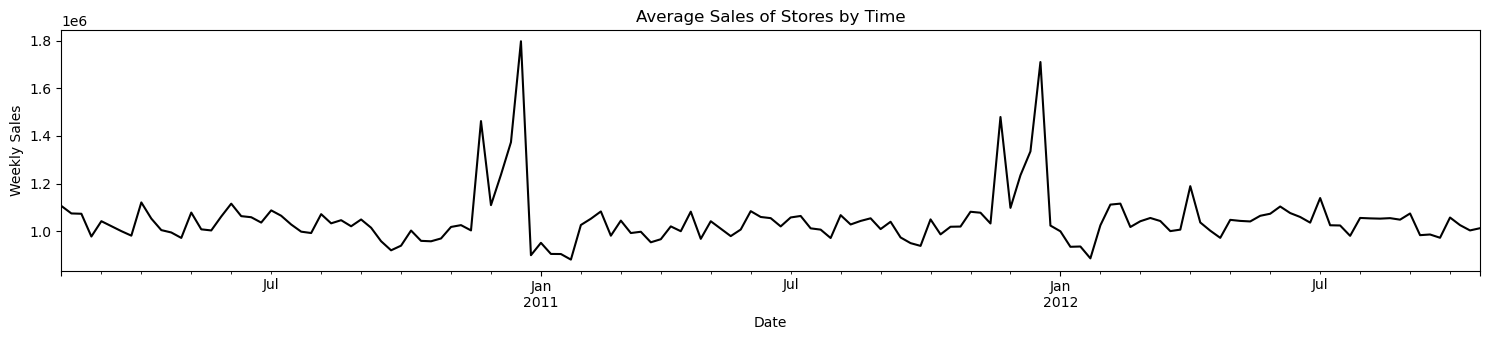

In [138]:
# First we will plot the weekly sales mean of all the stores by dates
date_grouped_mean['Weekly_Sales'].plot(color='k' ,figsize=(15,3.5))
plt.title('Average Sales of Stores by Time')
plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.show()

**From the above graph we can see clear seasonal patterns on a yearly level**

Lets see if the pattern repeats on individual store level also

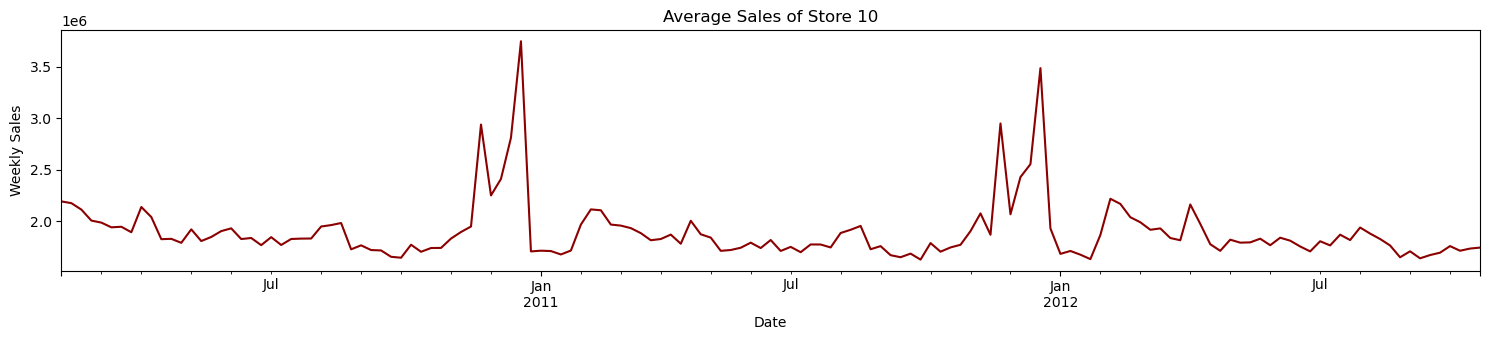

In [139]:
store[10]['Weekly_Sales'].plot(color='darkred' ,figsize=(15,3.5))
plt.title('Average Sales of Store 10')
plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.show()

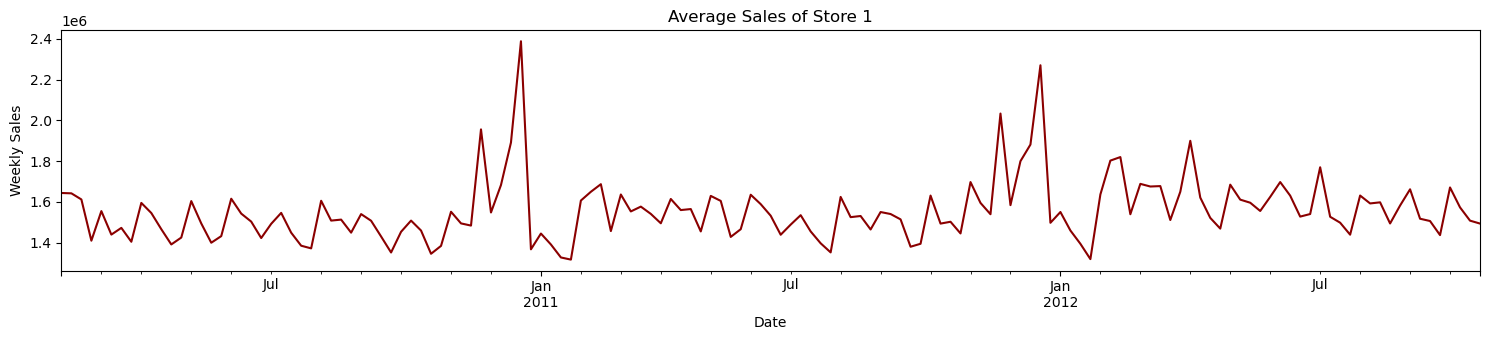

In [140]:
store[1]['Weekly_Sales'].plot(color='darkred' ,figsize=(15,3.5))
plt.title('Average Sales of Store 1')
plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.show()

**As we can see the exact same patter exists on an individual store level also**

**Lets break down the components of this time series data**

In [141]:
# To decompose time series data down to its individual components
from statsmodels.tsa.seasonal import seasonal_decompose

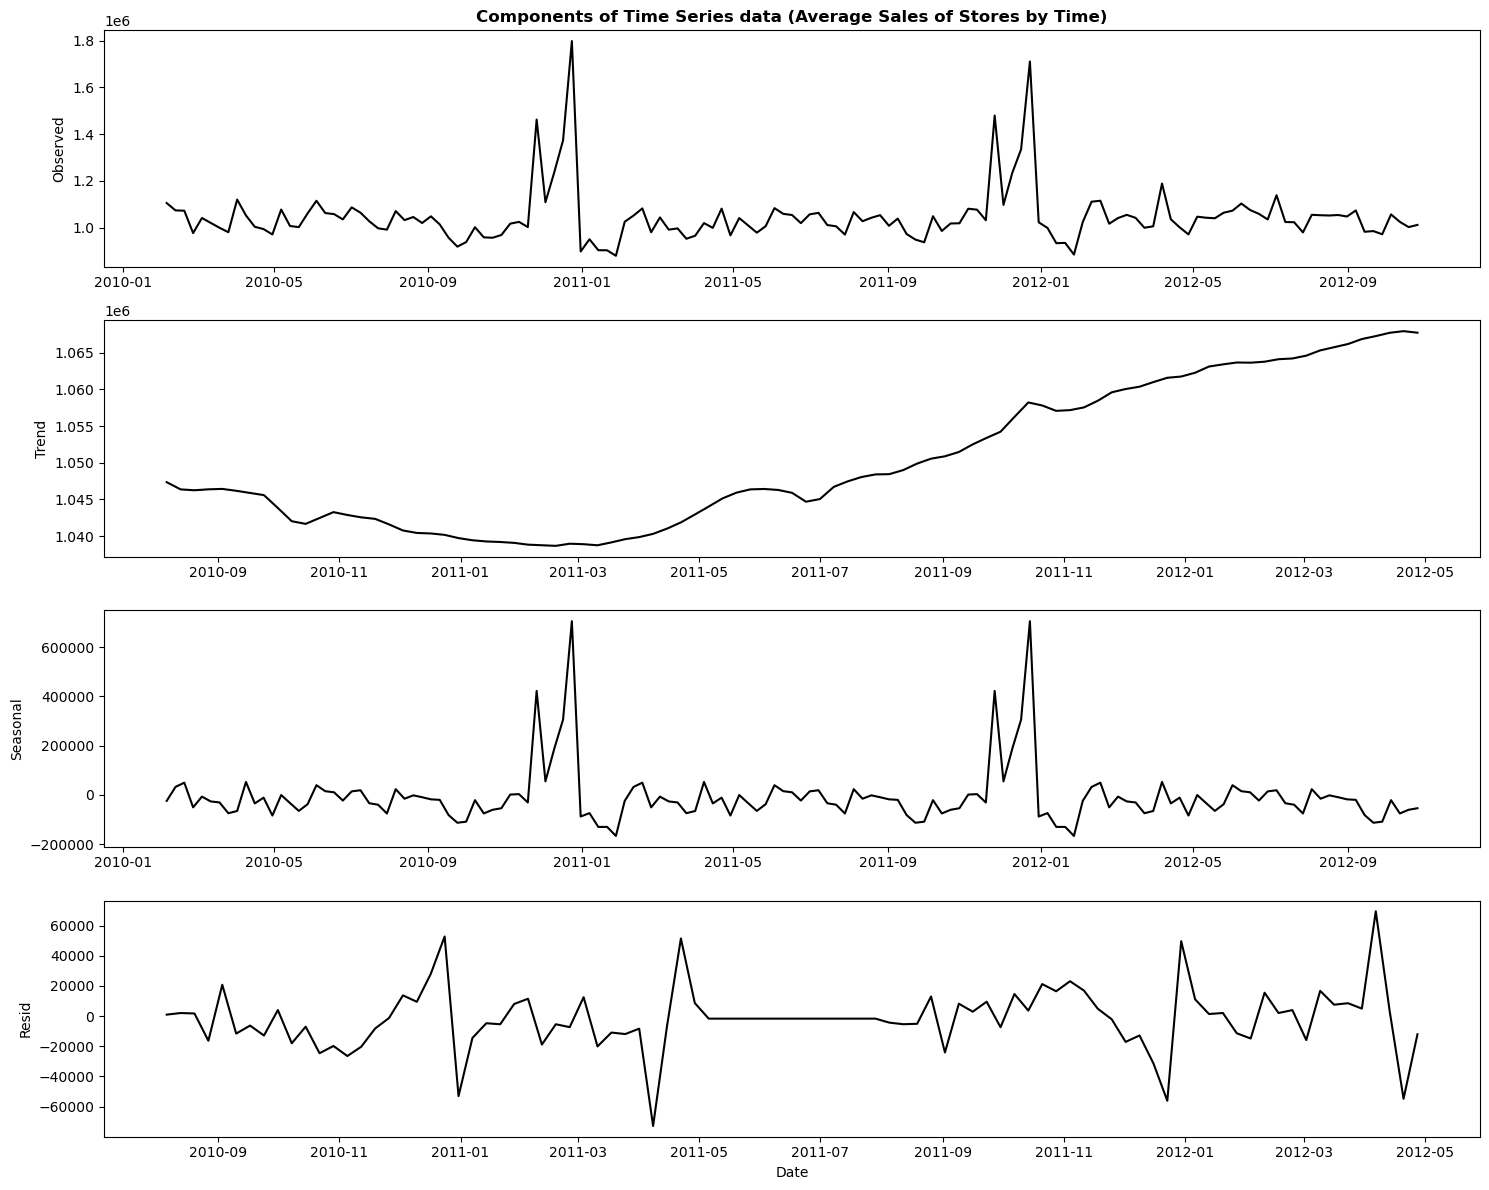

In [142]:
decompose = seasonal_decompose(date_grouped_mean['Weekly_Sales'],model='additive')

_,axes = plt.subplots(4,1,figsize=(15, 12))
axes = axes.flatten()

for i,j in enumerate(['Observed','Trend','Seasonal','Resid']):
    axes[i].plot(getattr(decompose, j.lower()),color='k')
    axes[i].set_ylabel(j)

plt.xlabel('Date')
axes[0].set_title('Components of Time Series data (Average Sales of Stores by Time)',fontweight='bold')
plt.tight_layout()
plt.show()

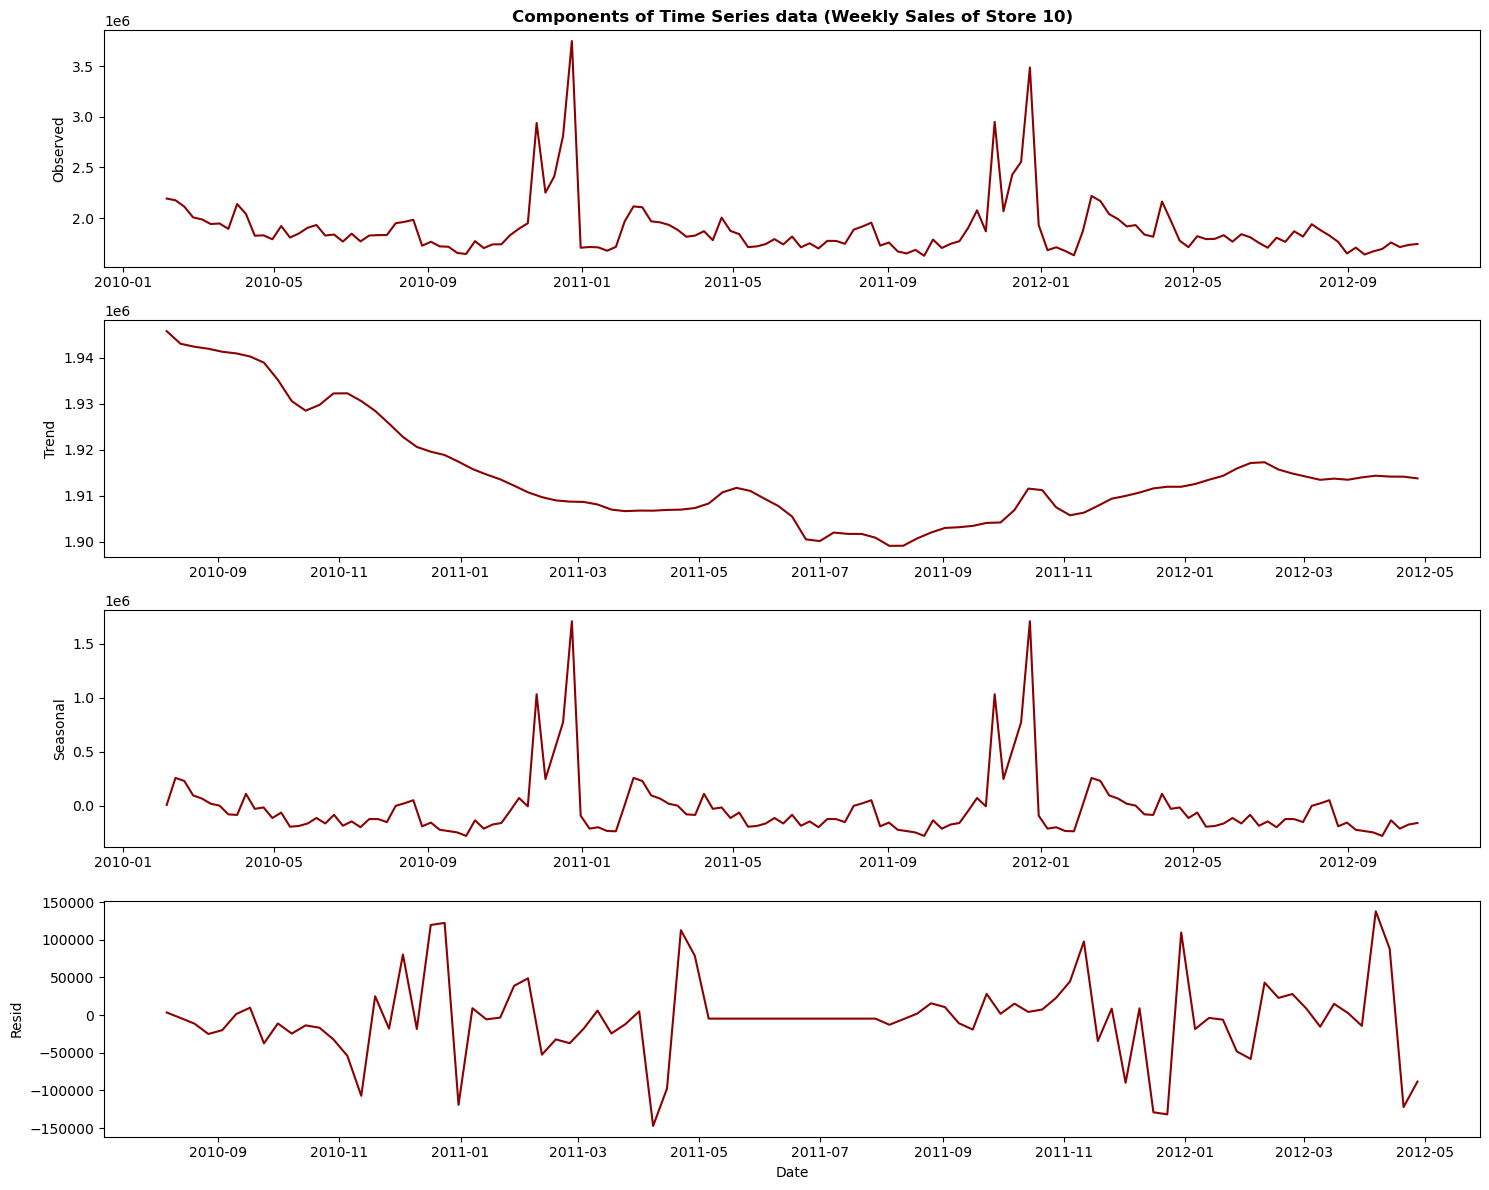

In [143]:
decompose = seasonal_decompose(store[10]['Weekly_Sales'],model='additive')

_,axes = plt.subplots(4,1,figsize=(15, 12))
axes = axes.flatten()

for i,j in enumerate(['Observed','Trend','Seasonal','Resid']):
    axes[i].plot(getattr(decompose, j.lower()),color='darkred')
    axes[i].set_ylabel(j)

plt.xlabel('Date')
axes[0].set_title('Components of Time Series data (Weekly Sales of Store 10)',fontweight='bold')
plt.tight_layout()
plt.show()

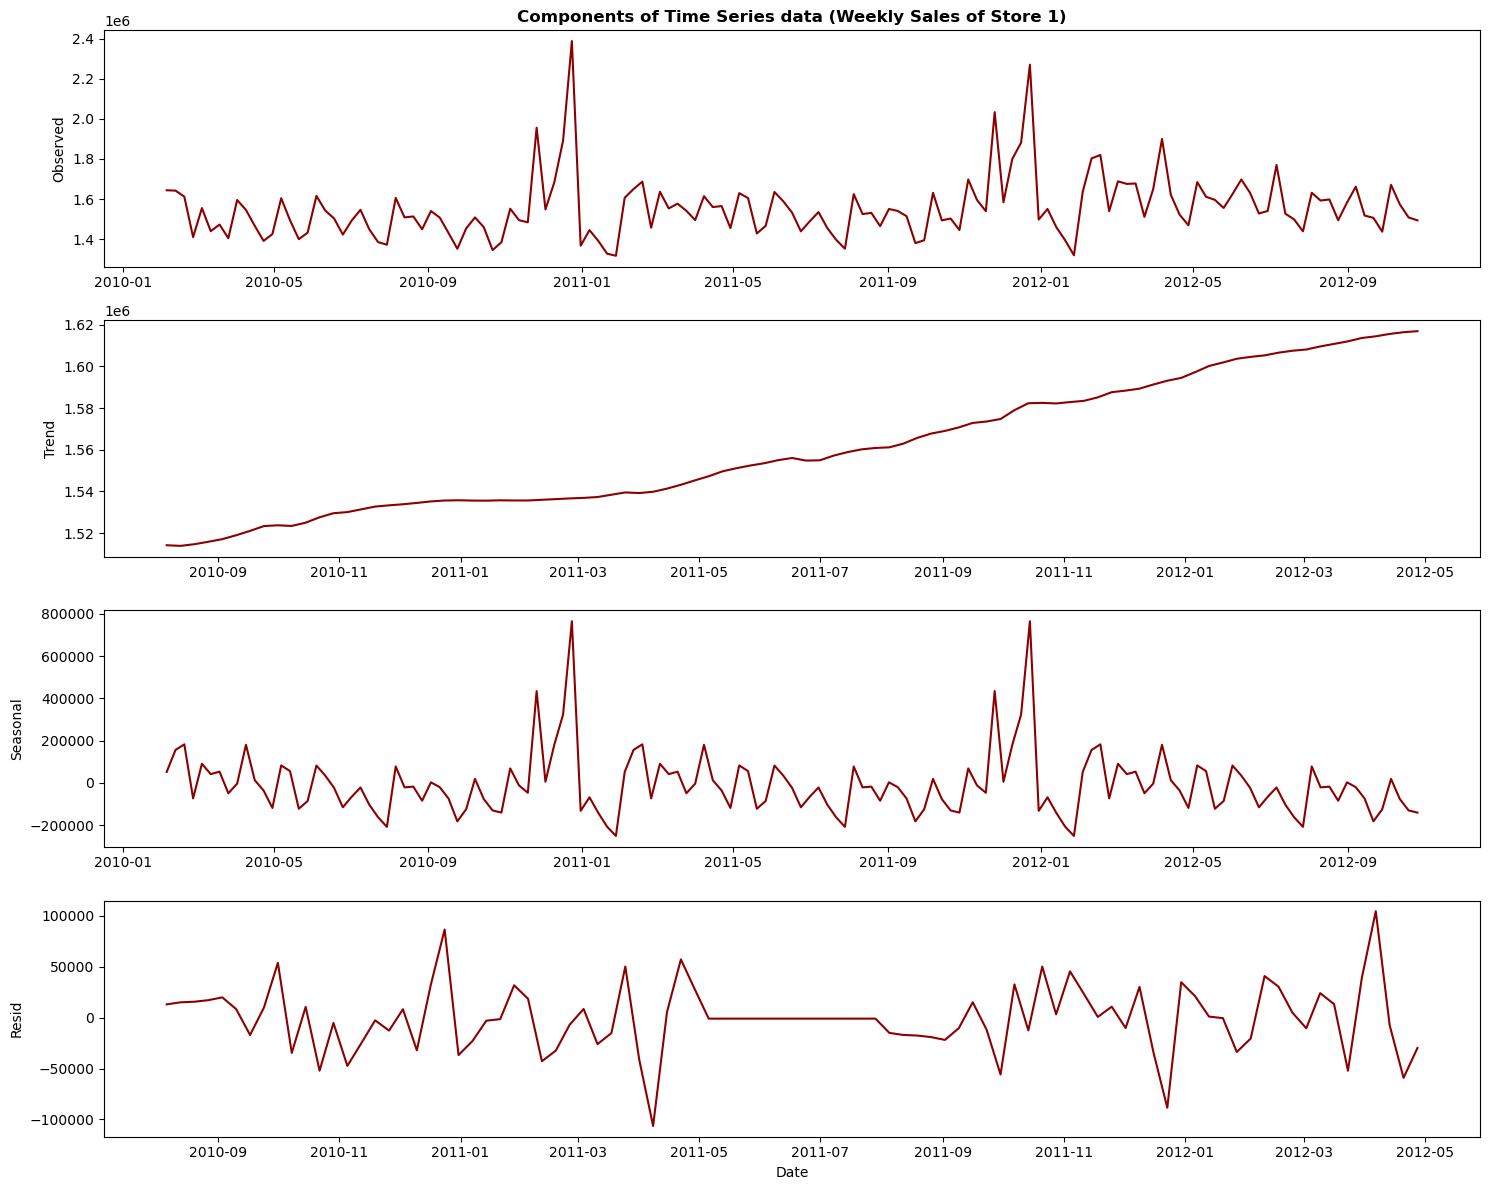

In [144]:
decompose = seasonal_decompose(store[1]['Weekly_Sales'],model='additive')

_,axes = plt.subplots(4,1,figsize=(15, 12))
axes = axes.flatten()

for i,j in enumerate(['Observed','Trend','Seasonal','Resid']):
    axes[i].plot(getattr(decompose, j.lower()),color='darkred')
    axes[i].set_ylabel(j)

plt.xlabel('Date')
axes[0].set_title('Components of Time Series data (Weekly Sales of Store 1)',fontweight='bold')
plt.tight_layout()
plt.show()

**As week can see from the above graphs, when taken as a whole(Avg. Weekly sales) the overall trend is upward and the sesonality present is on a yearly level. Also one thing to note is that while breaking down the time series components on individual store level, there are some stores where the trend is downward, like that of Store 10 shown above**

Let us try to understand what are the factors that could be the reason for this seasonaity

In [145]:
from sklearn.preprocessing import MinMaxScaler

In [146]:
# We will bring all the data between same scale before analyzing further for this
minmax = MinMaxScaler()
date_grouped_mean_scaled = pd.DataFrame(minmax.fit_transform(date_grouped_mean),
                                        columns=date_grouped_mean.columns,
                                        index=date_grouped_mean.index).drop('Store',axis=1)

In [147]:
# Storing the scaled data for each store in a dictionary
for key,values in store.items():
    store[key] = pd.DataFrame(minmax.fit_transform(values),
                                        columns=values.columns,
                                        index=values.index).drop('Store',axis=1)

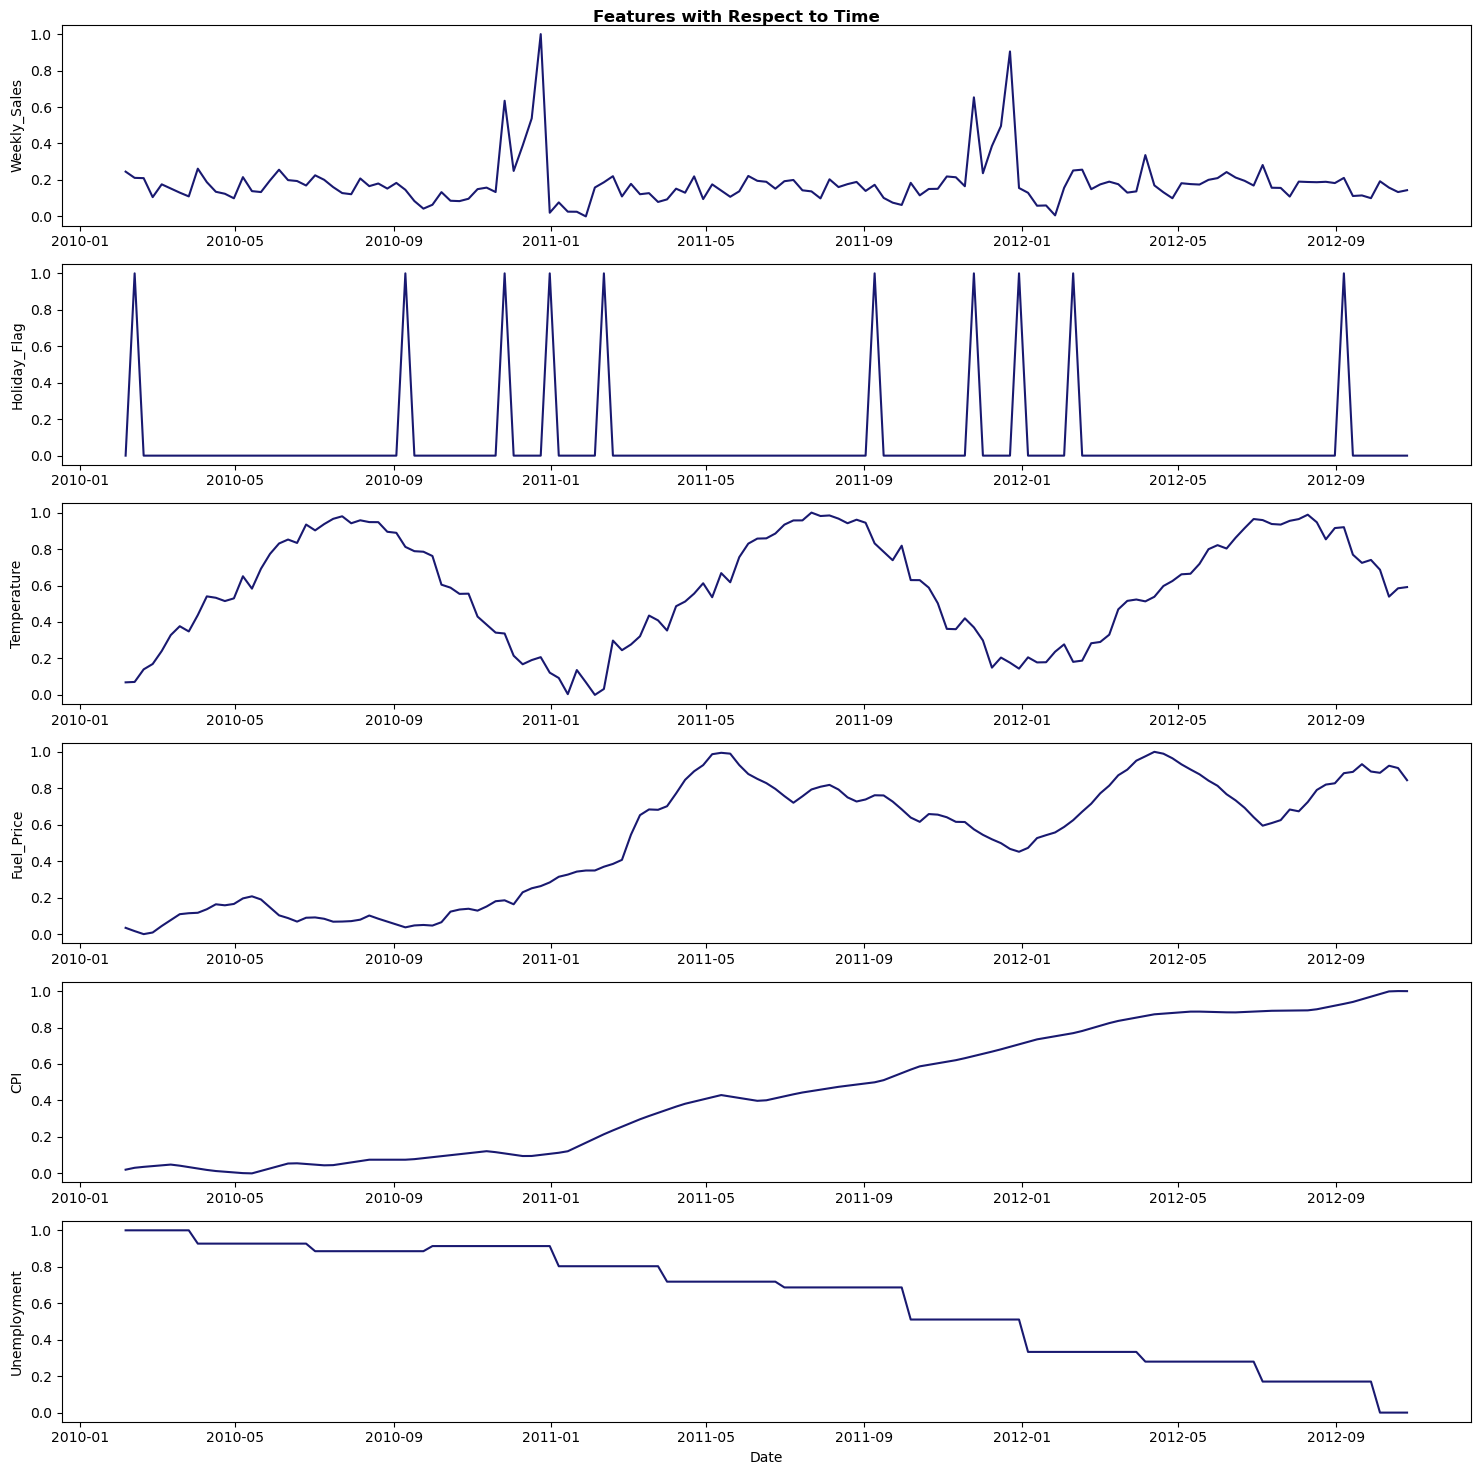

In [148]:
# Comparing hoe the features change with respect to time 
features_to_plot = date_grouped_mean_scaled.columns
fig, axs = plt.subplots(len(features_to_plot), figsize=(15, 15))

for i, feature in enumerate(features_to_plot):
    axs[i].plot(date_grouped_mean_scaled.index, date_grouped_mean_scaled[feature], color='midnightblue')
    axs[i].set_ylabel(feature)

plt.suptitle('Features with Respect to Time',fontweight='bold')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

**From the graphs of all the features plotted against time, it is evident that the sales increased during periods of seasonality, specifically between holiday weeks, and the temperature was consistently lower during these times. This observation suggests that these features (Holiday_Flag & Temperature) may be influencing the sales the most out of all the other features**

**To deepen our understanding of the observed relationship, we will construct a machine learning model to evaluate the significance of 'Holiday_Flag' and 'Temperature' as potential influential factors affecting weekly sales. Through feature importance analysis, we will be able to quantify the impact of these features on our predictive model, providing further insights into their individual contributions to the observed patterns in sales.**

In [149]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [150]:
# To get feature importances based in these models
xg = XGBRegressor(random_state=7)
rf = RandomForestRegressor(random_state=7)

In [151]:
# preparing the data
X = date_grouped_mean_scaled.iloc[:,1:]
y = date_grouped_mean_scaled['Weekly_Sales']

In [152]:
# checking the accuracy
xg.fit(X,y)
xg.score(X,y)

0.9998786781024578

In [153]:
rf.fit(X,y)
rf.score(X,y)

0.8654555595284368

We will consider the feature importances provided by the XGBoost model, as it is able to explain the variance of weekly sales to almost a 100%, when compared to the RandomForest model. This is good in our scenario where we want to know which features are significantly affecting the weekly sales.

In [154]:
feature_importances = pd.DataFrame({'Features':X.columns,
                                    'Importance(%)':(xg.feature_importances_ * 100).round(2)
                                    }).sort_values('Importance(%)',ascending=False).set_index('Features')
feature_importances

Importance(%)
Features                   
Holiday_Flag      36.299999
Temperature       23.219999
Fuel_Price        18.320000
CPI               17.840000
Unemployment       4.320000

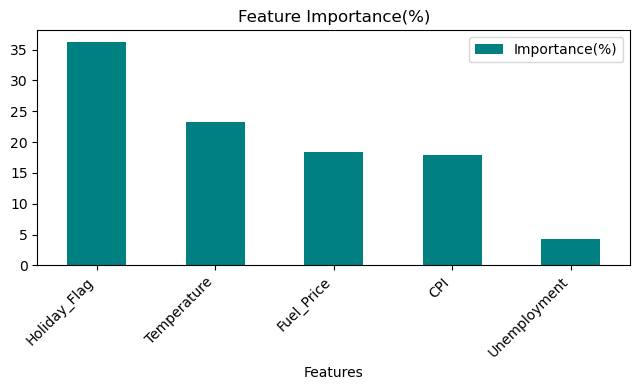

In [155]:
feature_importances.plot(kind='bar',figsize=(6.5,4),color='teal')
plt.title('Feature Importance(%)')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

**This supports our initial observation that Holiday_Flag and Temeprature were the features that affected Weekly Sales the most.**

**From feature importance analysis, we can conclude that the Holiday_Flag (if it is a holiday week) affected the Weekly Sales the most.** **(Weekly sales increased by a lot in between Holiday_Flag's)**

**Temperature also influenced Weekly Sales, with lower temperatures leading to more purchases and higher temperatures leading to a decrease in purchases (it is negatively correlated).**

Note: While feature importances indicate the strength of the relationship between features and the target variable (Weekly Sales), they do not establish causality. High feature importance suggests significant predictive power, encompassing both linear and non-linear relationships, and does not necessarily imply causation. Causation implies a direct cause-and-effect relationship, and feature importance alone cannot confirm causation.

<center>  ------------------------------------------------------------------------------------------------------------------------------ </center>

#### e) How is the Consumer Price index affecting the weekly sales of various stores?

In [156]:
store = {key:df[df['Store'] == key].set_index('Store') for key in range(1,46)}
grouped_store_means = grouped.mean(numeric_only=True).drop('Holiday_Flag',axis=1)

**Lets us find the correlation between Weekly Sales and CPI for each store**

In [157]:
correlation_CPI = {}
for key in store.keys():
    correlation_CPI[key] = store[key].corrwith(store[key]['Weekly_Sales'],numeric_only=True)['CPI']

# Sorting the correlations from negative correlation to positive correlation
correlation_CPI = dict(sorted(correlation_CPI.items(), key= lambda x:x[1], reverse=False))

In [158]:
correlation_CPI

{36: -0.9150952776725552,
 35: -0.4241071564963808,
 14: -0.41975479220453016,
 30: -0.29818804760655643,
 43: -0.28568626698243316,
 27: -0.21308232046967787,
 18: -0.19354111699294185,
 15: -0.1744674766843987,
 21: -0.16364877012627854,
 19: -0.15534107232709543,
 10: -0.1153741724021544,
 28: -0.09590808342001095,
 29: -0.07253033622918136,
 2: -0.06243107067007714,
 33: -0.05227128201719589,
 22: -0.03860228673099103,
 45: -0.02354762041858093,
 24: -0.013684306211754337,
 6: -0.0113574846395366,
 25: -0.01091433064843309,
 20: 0.05870588224585229,
 11: 0.06978058146346157,
 12: 0.08408667242574058,
 23: 0.0842479894010448,
 40: 0.11331786747501021,
 34: 0.1154373098011894,
 8: 0.1202552303609908,
 16: 0.12428457759372662,
 26: 0.13197951444431208,
 31: 0.13288658242840073,
 13: 0.16397584057555667,
 32: 0.19678204967738572,
 1: 0.2254076594290444,
 37: 0.24450653322669375,
 7: 0.28904437749320994,
 9: 0.2948054830029043,
 5: 0.3082612991681616,
 3: 0.31724963399858214,
 17: 0.348

In [159]:
len([value for key,value in correlation_CPI.items() if value < 0])
# These are the number of stores where CPI is negatively correlated with Weekly Sales

20

In [160]:
print(f'The stores with negative correlation between CPI and Weekly Sales, listed in descending order, are: \n'
      f'{", ".join([str(key) for key,value in correlation_CPI.items() if value < 0])}')

The stores with negative correlation between CPI and Weekly Sales, listed in descending order, are: 
36, 35, 14, 30, 43, 27, 18, 15, 21, 19, 10, 28, 29, 2, 33, 22, 45, 24, 6, 25


In [161]:
len([value for key,value in correlation_CPI.items() if value > 0])
# These are the number of stores where CPI is positively correlated with Weekly Sales

25

In [162]:
print(f'The stores with positive correlation between CPI and Weekly Sales, listed in ascending order, are: \n'
      f'{", ".join([str(key) for key,value in correlation_CPI.items() if value > 0])}')

The stores with positive correlation between CPI and Weekly Sales, listed in ascending order, are: 
20, 11, 12, 23, 40, 34, 8, 16, 26, 31, 13, 32, 1, 37, 7, 9, 5, 3, 17, 4, 42, 41, 39, 44, 38


**As seen from the above outputs on individual store level, the Weekly Sales of 20 stores out of 45 are negatively correlated with CPI and 25 are positively correlated with CPI.**

Let us visualize the above result

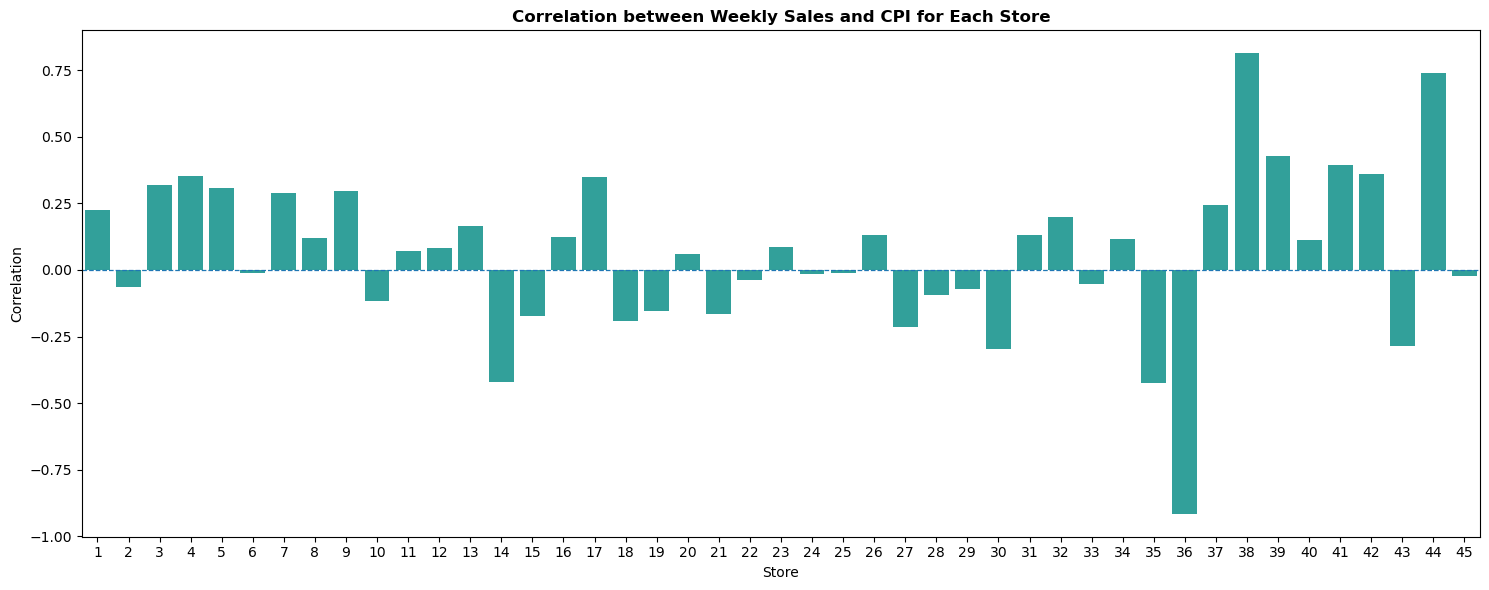

In [163]:
plt.figure(figsize=(15,6))
sb.barplot(x=correlation_CPI.keys(),y=correlation_CPI.values(),color='lightseagreen')
plt.axhline(0,linestyle='--',linewidth=0.9)
plt.title('Correlation between Weekly Sales and CPI for Each Store',fontweight='bold')
plt.xlabel('Store')
plt.ylabel('Correlation')
plt.tight_layout()
plt.show()

**Store 36 is the store where CPI is most negatively correlated (-0.91) with Weekly Sales and Store 38 is the store where it is most positively correlated (0.81)**

Let us see the satistical summary of these 2 stores

In [164]:
store[36].describe().iloc[:,1:]

Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
count     143.000000    143.000000   143.000000  143.000000  143.000000   
mean   373511.992797      0.069930    71.160350    3.204203  214.729069   
min    270677.980000      0.000000    41.160000    2.472000  209.118536   
25%    320540.030000      0.000000    62.465000    2.725000  210.312937   
50%    373267.580000      0.000000    73.570000    3.275000  214.192157   
75%    426489.915000      0.000000    81.805000    3.572500  219.219647   
max    489372.020000      1.000000    87.640000    3.934000  222.113657   
std     60725.173579      0.255926    12.094075    0.447337    4.315290   

       Unemployment  
count    143.000000  
mean       7.869049  
min        6.228000  
25%        7.244000  
50%        8.300000  
75%        8.395000  
max        8.554000  
std        0.702688

In [165]:
store[38].describe().iloc[:,1:]

Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
count     143.000000    143.000000   143.000000  143.000000  143.000000   
mean   385731.653287      0.069930    70.262797    3.606420  128.679669   
min    303908.810000      0.000000    37.640000    2.825000  126.064000   
25%    350365.655000      0.000000    53.985000    3.125000  126.590094   
50%    380870.090000      0.000000    68.660000    3.705000  129.075677   
75%    414198.140000      0.000000    85.425000    3.966000  130.502414   
max    499267.660000      1.000000    99.220000    4.468000  131.193097   
std     42768.169450      0.255926    16.630317    0.447926    1.858300   

       Unemployment  
count    143.000000  
mean      13.116483  
min       10.199000  
25%       12.187000  
50%       13.736000  
75%       14.099000  
max       14.313000  
std        1.208114

Comparing the statistics of store 36 and store 38, we observe that the **CPI mean and standard deviation in store 38 are significantly lower than those in store 36.**

**Lets us visualize the realtion between CPI and Weekly Sales for these 2 stores**

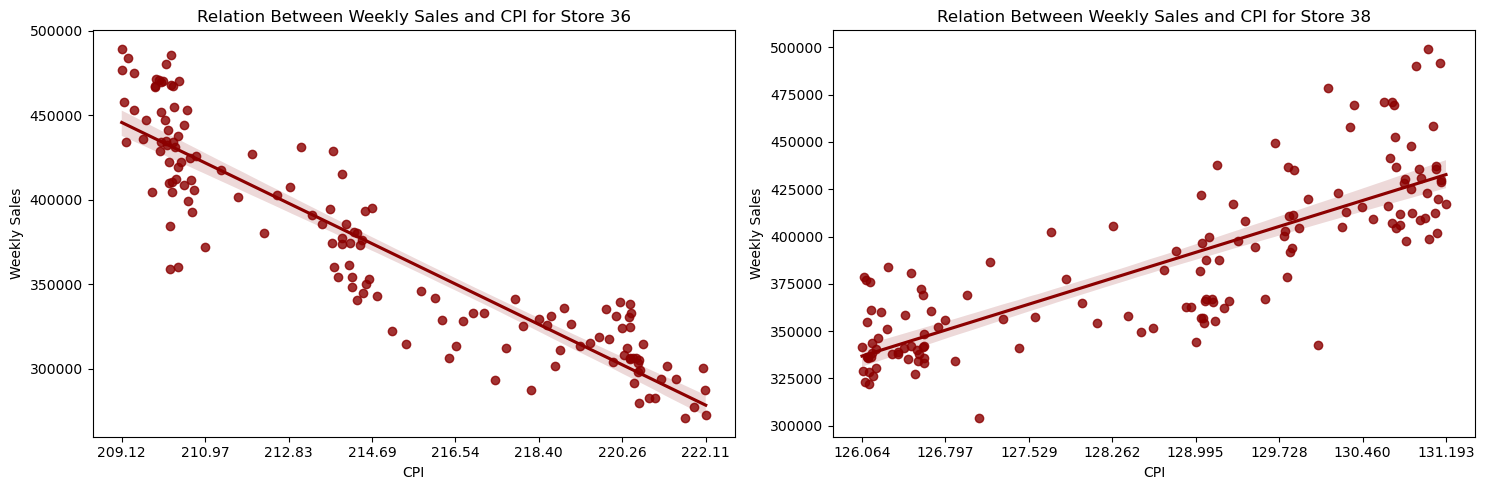

In [166]:
_ , axes = plt.subplots(1,2,figsize=(2*7.5,1*5))
for ax,i in enumerate([36,38]):
    sb.regplot(y=store[i]['Weekly_Sales'],x=store[i]['CPI'],color='darkred',ax=axes[ax])
    axes[ax].set_xlabel('CPI')
    axes[ax].set_ylabel('Weekly Sales')
    axes[ax].set_title(f'Relation Between Weekly Sales and CPI for Store {i}')
    axes[ax].set_xticks(np.linspace(store[i]['CPI'].min(), store[i]['CPI'].max(), 8))
plt.tight_layout()
plt.show()

**Finding the overall correlation between Weekly Sales and CPI**

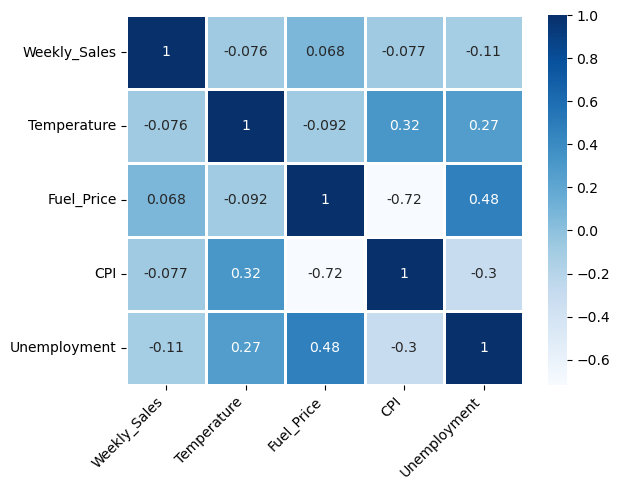

In [167]:
grouped_store_means_corr = grouped_store_means.corr()

sb.heatmap(grouped_store_means_corr, annot=True, cmap='Blues',linewidth=0.75)
plt.xticks(rotation=45,ha='right')
plt.show()

**Let us visualize the overal relation between CPI and Weekly Sales for all the stores**

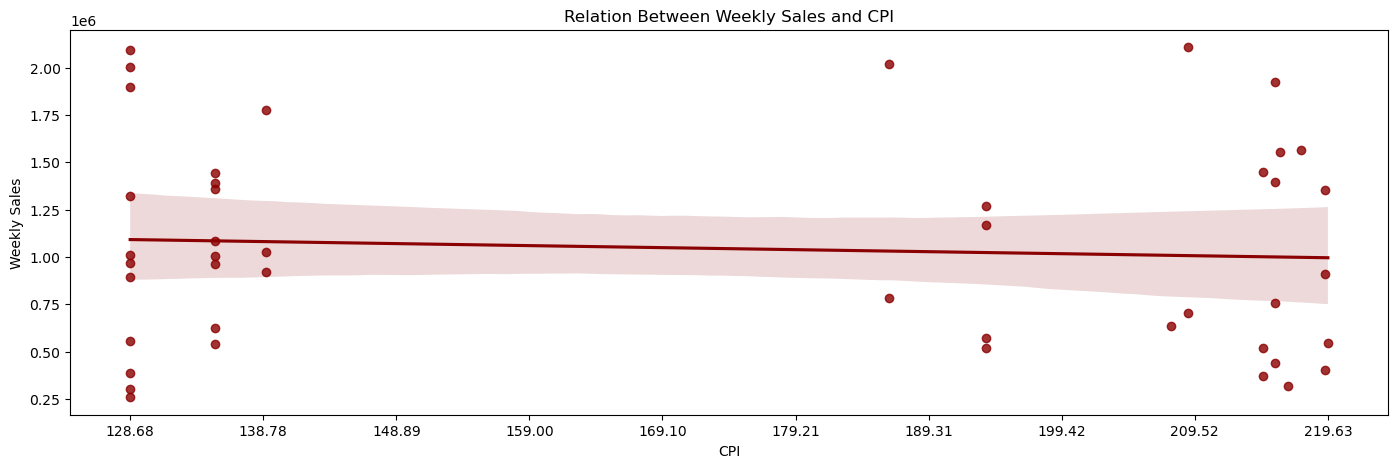

In [168]:
plt.figure(figsize=(17,5))
sb.regplot(grouped_store_means,x='CPI',y='Weekly_Sales',color='darkred')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.title('Relation Between Weekly Sales and CPI')
plt.xticks(np.linspace(grouped_store_means['CPI'].min(),grouped_store_means['CPI'].max(),10))
plt.show()

**Therefore based on our studies on this dataset as a whole, we can clearly see Weekly Sales is slightly negatively correlated with CPI. So as the CPI increases the Weeky Sales will decrease**

<center>  ------------------------------------------------------------------------------------------------------------------------------ </center>

#### e) Top performing stores according to the historical data.
#### f) The worst performing store, and how significant is the difference between the highest and lowest performing stores.

To find out the top performing and worst performing stores based on weekly sales, we will first group the dataset by the stores and then take the total sum for the weekly sales, giving us the total sales for each store.

In [169]:
total_sales = df.groupby('Store').sum(numeric_only=True)[['Weekly_Sales']]
total_sales.head()

Weekly_Sales
Store              
1      2.224028e+08
2      2.753824e+08
3      5.758674e+07
4      2.995440e+08
5      4.547569e+07

In [170]:
total_sales_sorted = total_sales.sort_values('Weekly_Sales',ascending=False)
total_sales_sorted['Sales_Rank'] = range(1,46)
total_sales_sorted.head(10)

Weekly_Sales  Sales_Rank
Store                          
20     3.013978e+08           1
4      2.995440e+08           2
14     2.889999e+08           3
13     2.865177e+08           4
2      2.753824e+08           5
10     2.716177e+08           6
27     2.538559e+08           7
6      2.237561e+08           8
1      2.224028e+08           9
39     2.074455e+08          10

**Let us visualize total sales of each store for the entire time period in our dataset**

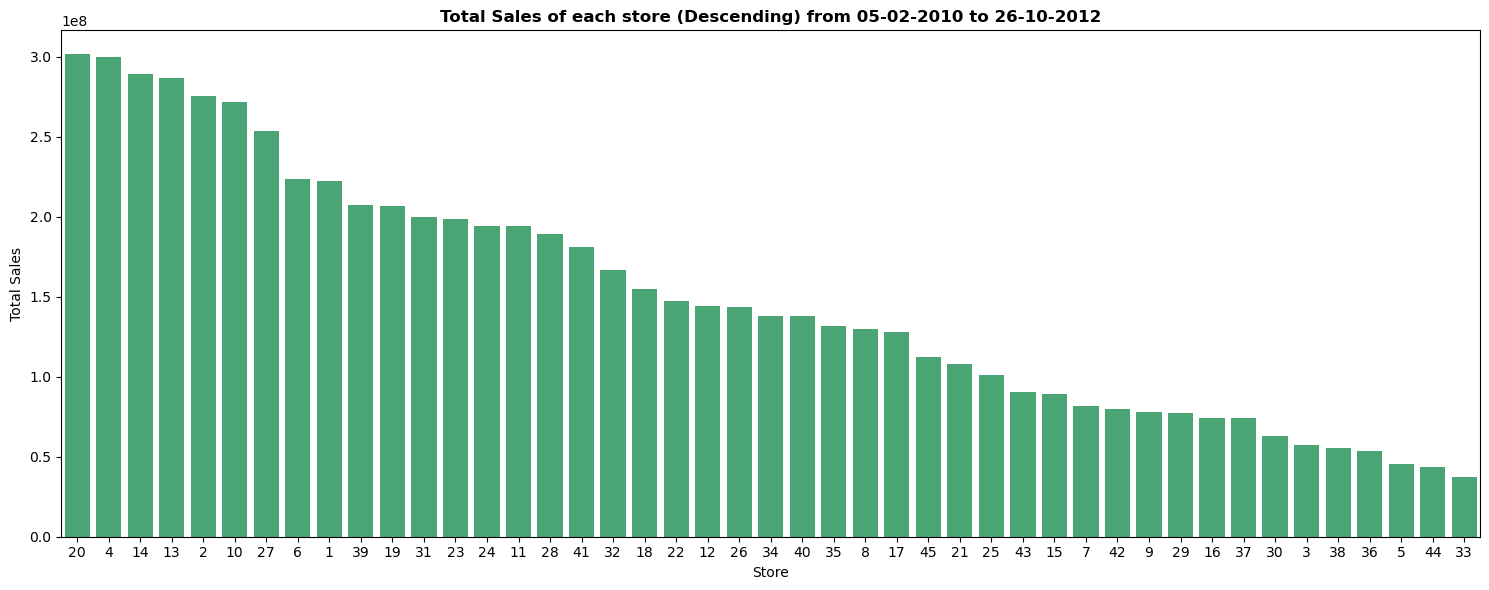

In [171]:
plt.figure(figsize=(15, 6))
sb.barplot(x=total_sales_sorted.index.astype(str), y=total_sales_sorted['Weekly_Sales'], color='mediumseagreen')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.title(f"Total Sales of each store (Descending) from {df['Date'].min().strftime('%d-%m-%Y')} to {df['Date'].max().strftime('%d-%m-%Y')}",
          fontweight='bold')
plt.tight_layout()
plt.show()

**Visualizing the top performing and the least performing stores**

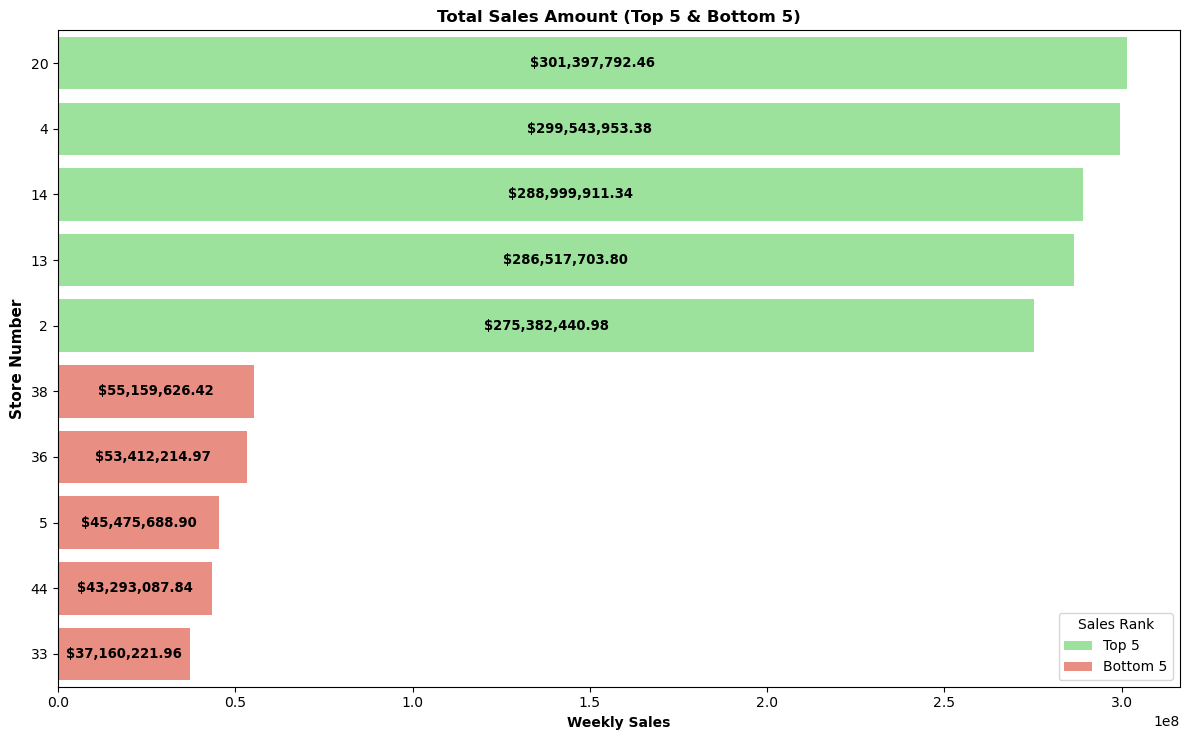

In [172]:
First_Last = pd.concat([total_sales_sorted[['Weekly_Sales']].head().assign(Sales_Rank='Top 5'), \
                        total_sales_sorted[['Weekly_Sales']].tail().assign(Sales_Rank='Bottom 5')])

plt.figure(figsize=(12,7.5))
sb.barplot(First_Last, x='Weekly_Sales', y=First_Last.index.astype(str), orient='h', hue='Sales_Rank', palette=['lightgreen','salmon'])

for index,value in enumerate(First_Last['Weekly_Sales']):
    plt.text(value/2, index, f'${value:,.2f}', ha='center', va='center', fontsize=9.5, color='k', fontweight='bold')

plt.title('Total Sales Amount (Top 5 & Bottom 5)', fontweight='bold')
plt.xlabel('Weekly Sales', fontweight='bold', fontsize=10)
plt.ylabel('Store Number', fontweight='bold', fontsize=11)
plt.legend(title='Sales Rank')
plt.tight_layout()
plt.show()

Finding the difference in sales of the Top performing and Least performing stores

In [173]:
difference = total_sales_sorted['Weekly_Sales'].max() - total_sales_sorted['Weekly_Sales'].min()
difference

264237570.49999997

In [174]:
percentage_difference = round(((difference / total_sales_sorted['Weekly_Sales'].max()) * 100),2)
percentage_difference

87.67

**The difference between the total sales of Top performing and Least performing stores is: `$264,237,570.50`**

**The weekly sales of Store 33 (the least performing) are `87.67%` less than that of the top-performing store (Store 20).**

<center>  ------------------------------------------------------------------------------------------------------------------------------ </center>

#### **2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks**

We will use the prophet library to do this task

In [175]:
# Importing the required API's for building forecast models, for plotting results and for diagnostics 
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [176]:
# Importing the warnings module to suppress warning messages
import warnings
warnings.filterwarnings('ignore')

In [177]:
import logging
# Disable all logging
logging.disable(logging.CRITICAL)
# This is done to disable the long messages that appear during training and cross validation in Prophet library  

Let us prepare the dataset in a way that is suitable for the prophet library. We will make the store number as index and take only 2 columns date and weekly sales and rename it as ds and y as required for the prophet library and then store it in a dictionary

In [178]:
model_store = {key:df[df['Store'] == key][['Store','Date','Weekly_Sales']] \
               .rename({'Date':'ds','Weekly_Sales':'y'},axis=1) \
                .set_index('Store') for key in range(1,46)}
model_store

{1:               ds           y
 Store                       
 1     2010-02-05  1643690.90
 1     2010-02-12  1641957.44
 1     2010-02-19  1611968.17
 1     2010-02-26  1409727.59
 1     2010-03-05  1554806.68
 ...          ...         ...
 1     2012-09-28  1437059.26
 1     2012-10-05  1670785.97
 1     2012-10-12  1573072.81
 1     2012-10-19  1508068.77
 1     2012-10-26  1493659.74
 
 [143 rows x 2 columns],
 2:               ds           y
 Store                       
 2     2010-02-05  2136989.46
 2     2010-02-12  2137809.50
 2     2010-02-19  2124451.54
 2     2010-02-26  1865097.27
 2     2010-03-05  1991013.13
 ...          ...         ...
 2     2012-09-28  1746470.56
 2     2012-10-05  1998321.04
 2     2012-10-12  1900745.13
 2     2012-10-19  1847990.41
 2     2012-10-26  1834458.35
 
 [143 rows x 2 columns],
 3:               ds          y
 Store                      
 3     2010-02-05  461622.22
 3     2010-02-12  420728.96
 3     2010-02-19  421642.19
 3     2010-

Since we have holiday weeks that are given by Holiday_Flag column, we will make a dataframe that contains the holiday name(if availablle) and their dates so that it can be provided to our prophet model to fine tune the predictions by considering the impact of holidays on sales.

In [179]:
model_store_holidays = {key:df[(df['Store'] == key) & (df['Holiday_Flag'] == 1)][['Store','Holiday_Flag','Date']] \
                        .rename({'Date':'ds','Holiday_Flag':'holiday'},axis=1) \
                            .assign(holiday='holiday_week') \
                                .set_index('Store') for key in range(1,46)}
model_store_holidays

{1:             holiday         ds
 Store                         
 1      holiday_week 2010-02-12
 1      holiday_week 2010-09-10
 1      holiday_week 2010-11-26
 1      holiday_week 2010-12-31
 1      holiday_week 2011-02-11
 1      holiday_week 2011-09-09
 1      holiday_week 2011-11-25
 1      holiday_week 2011-12-30
 1      holiday_week 2012-02-10
 1      holiday_week 2012-09-07,
 2:             holiday         ds
 Store                         
 2      holiday_week 2010-02-12
 2      holiday_week 2010-09-10
 2      holiday_week 2010-11-26
 2      holiday_week 2010-12-31
 2      holiday_week 2011-02-11
 2      holiday_week 2011-09-09
 2      holiday_week 2011-11-25
 2      holiday_week 2011-12-30
 2      holiday_week 2012-02-10
 2      holiday_week 2012-09-07,
 3:             holiday         ds
 Store                         
 3      holiday_week 2010-02-12
 3      holiday_week 2010-09-10
 3      holiday_week 2010-11-26
 3      holiday_week 2010-12-31
 3      holiday_week 2011-02-

In [180]:
model = {}; forecast = {}

for key in model_store.keys():
    model[key] = Prophet(holidays=model_store_holidays[key])
    model[key].fit(model_store[key])
    future = model[key].make_future_dataframe(periods=12,freq='W')
    forecast[key] = model[key].predict(future)

**The code above performs time series forecasting using Prophet for 45 different stores. It generates forecasts for the next 12 weeks beyond the end date of the available data. The results, including forecast values and Prophet models, are stored in a dictionary for easy access when needed.**

See an example below which shows forecast results, randomly selecting a store between 1 - 45 each time

In [181]:
store_num = np.random.choice(range(1,46),size=1)[0]
print(f'This is the forecast results for store {store_num}:')
forecast[store_num]

This is the forecast results for store 18:


ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2010-02-05  1.183906e+06  1.056577e+06  1.323221e+06  1.183906e+06   
1   2010-02-12  1.181918e+06  1.102967e+06  1.371646e+06  1.181918e+06   
2   2010-02-19  1.179930e+06  1.015614e+06  1.296070e+06  1.179930e+06   
3   2010-02-26  1.177941e+06  9.995871e+05  1.269839e+06  1.177941e+06   
4   2010-03-05  1.175953e+06  1.001510e+06  1.279551e+06  1.175953e+06   
..         ...           ...           ...           ...           ...   
150 2012-12-16  1.112188e+06  1.502856e+06  1.784547e+06  1.111371e+06   
151 2012-12-23  1.113228e+06  1.428459e+06  1.692537e+06  1.112152e+06   
152 2012-12-30  1.114268e+06  1.155068e+06  1.424784e+06  1.112956e+06   
153 2013-01-06  1.115309e+06  8.613750e+05  1.132787e+06  1.113763e+06   
154 2013-01-13  1.116349e+06  6.924451e+05  9.682663e+05  1.114525e+06   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    1.183906e+06     1628.129665           1628.129665           1628.129665   
1    1.181918e+06    50955.117315          50955.117315          50955.117315   
2    1.179930e+06   -19622.908983         -19622.908983         -19622.908983   
3    1.177941e+06   -37872.745772         -37872.745772         -37872.745772   
4    1.175953e+06   -36667.440553         -36667.440553         -36667.440553   
..            ...             ...                   ...                   ...   
150  1.113126e+06   533190.278945         533190.278945         533190.278945   
151  1.114372e+06   444358.367918         444358.367918         444358.367918   
152  1.115646e+06   180911.283977         180911.283977         180911.283977   
153  1.116989e+06  -120249.906982        -120249.906982        -120249.906982   
154  1.118299e+06  -290857.259985        -290857.259985        -290857.259985   

     holiday_week  ...      holidays  holidays_lower  holidays_upper  \
0        0.000000  ...      0.000000        0.000000        0.000000   
1    39037.217165  ...  39037.217165    39037.217165    39037.217165   
2        0.000000  ...      0.000000        0.000000        0.000000   
3        0.000000  ...      0.000000        0.000000        0.000000   
4        0.000000  ...      0.000000        0.000000        0.000000   
..            ...  ...           ...             ...             ...   
150      0.000000  ...      0.000000        0.000000        0.000000   
151      0.000000  ...      0.000000        0.000000        0.000000   
152      0.000000  ...      0.000000        0.000000        0.000000   
153      0.000000  ...      0.000000        0.000000        0.000000   
154      0.000000  ...      0.000000        0.000000        0.000000   

            yearly   yearly_lower   yearly_upper  multiplicative_terms  \
0      1628.129665    1628.129665    1628.129665                   0.0   
1     11917.900150   11917.900150   11917.900150                   0.0   
2    -19622.908983  -19622.908983  -19622.908983                   0.0   
3    -37872.745772  -37872.745772  -37872.745772                   0.0   
4    -36667.440553  -36667.440553  -36667.440553                   0.0   
..             ...            ...            ...                   ...   
150  533190.278945  533190.278945  533190.278945                   0.0   
151  444358.367918  444358.367918  444358.367918                   0.0   
152  180911.283977  180911.283977  180911.283977                   0.0   
153 -120249.906982 -120249.906982 -120249.906982                   0.0   
154 -290857.259985 -290857.259985 -290857.259985                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0  1.185534e+06  
1                           0.0                         0.0  1.232873e+06  
2                           0.0                         0.0  1.160307e+06  
3                           0.0                         0.0  1.140069e+06  
4               

In the above table **yhat shows the values forecasted by our prophet model and yhat_lower and yhat_upper are the confidence intervals** (Upper and lower bounds of the predicted values). Overall, the results show the forecasted values along with their upper and lower bounds, the trend, and various other additive and multiplicative components that contribute to the forecast.

**Lets us plot the forecast for the top 5 performing stores**

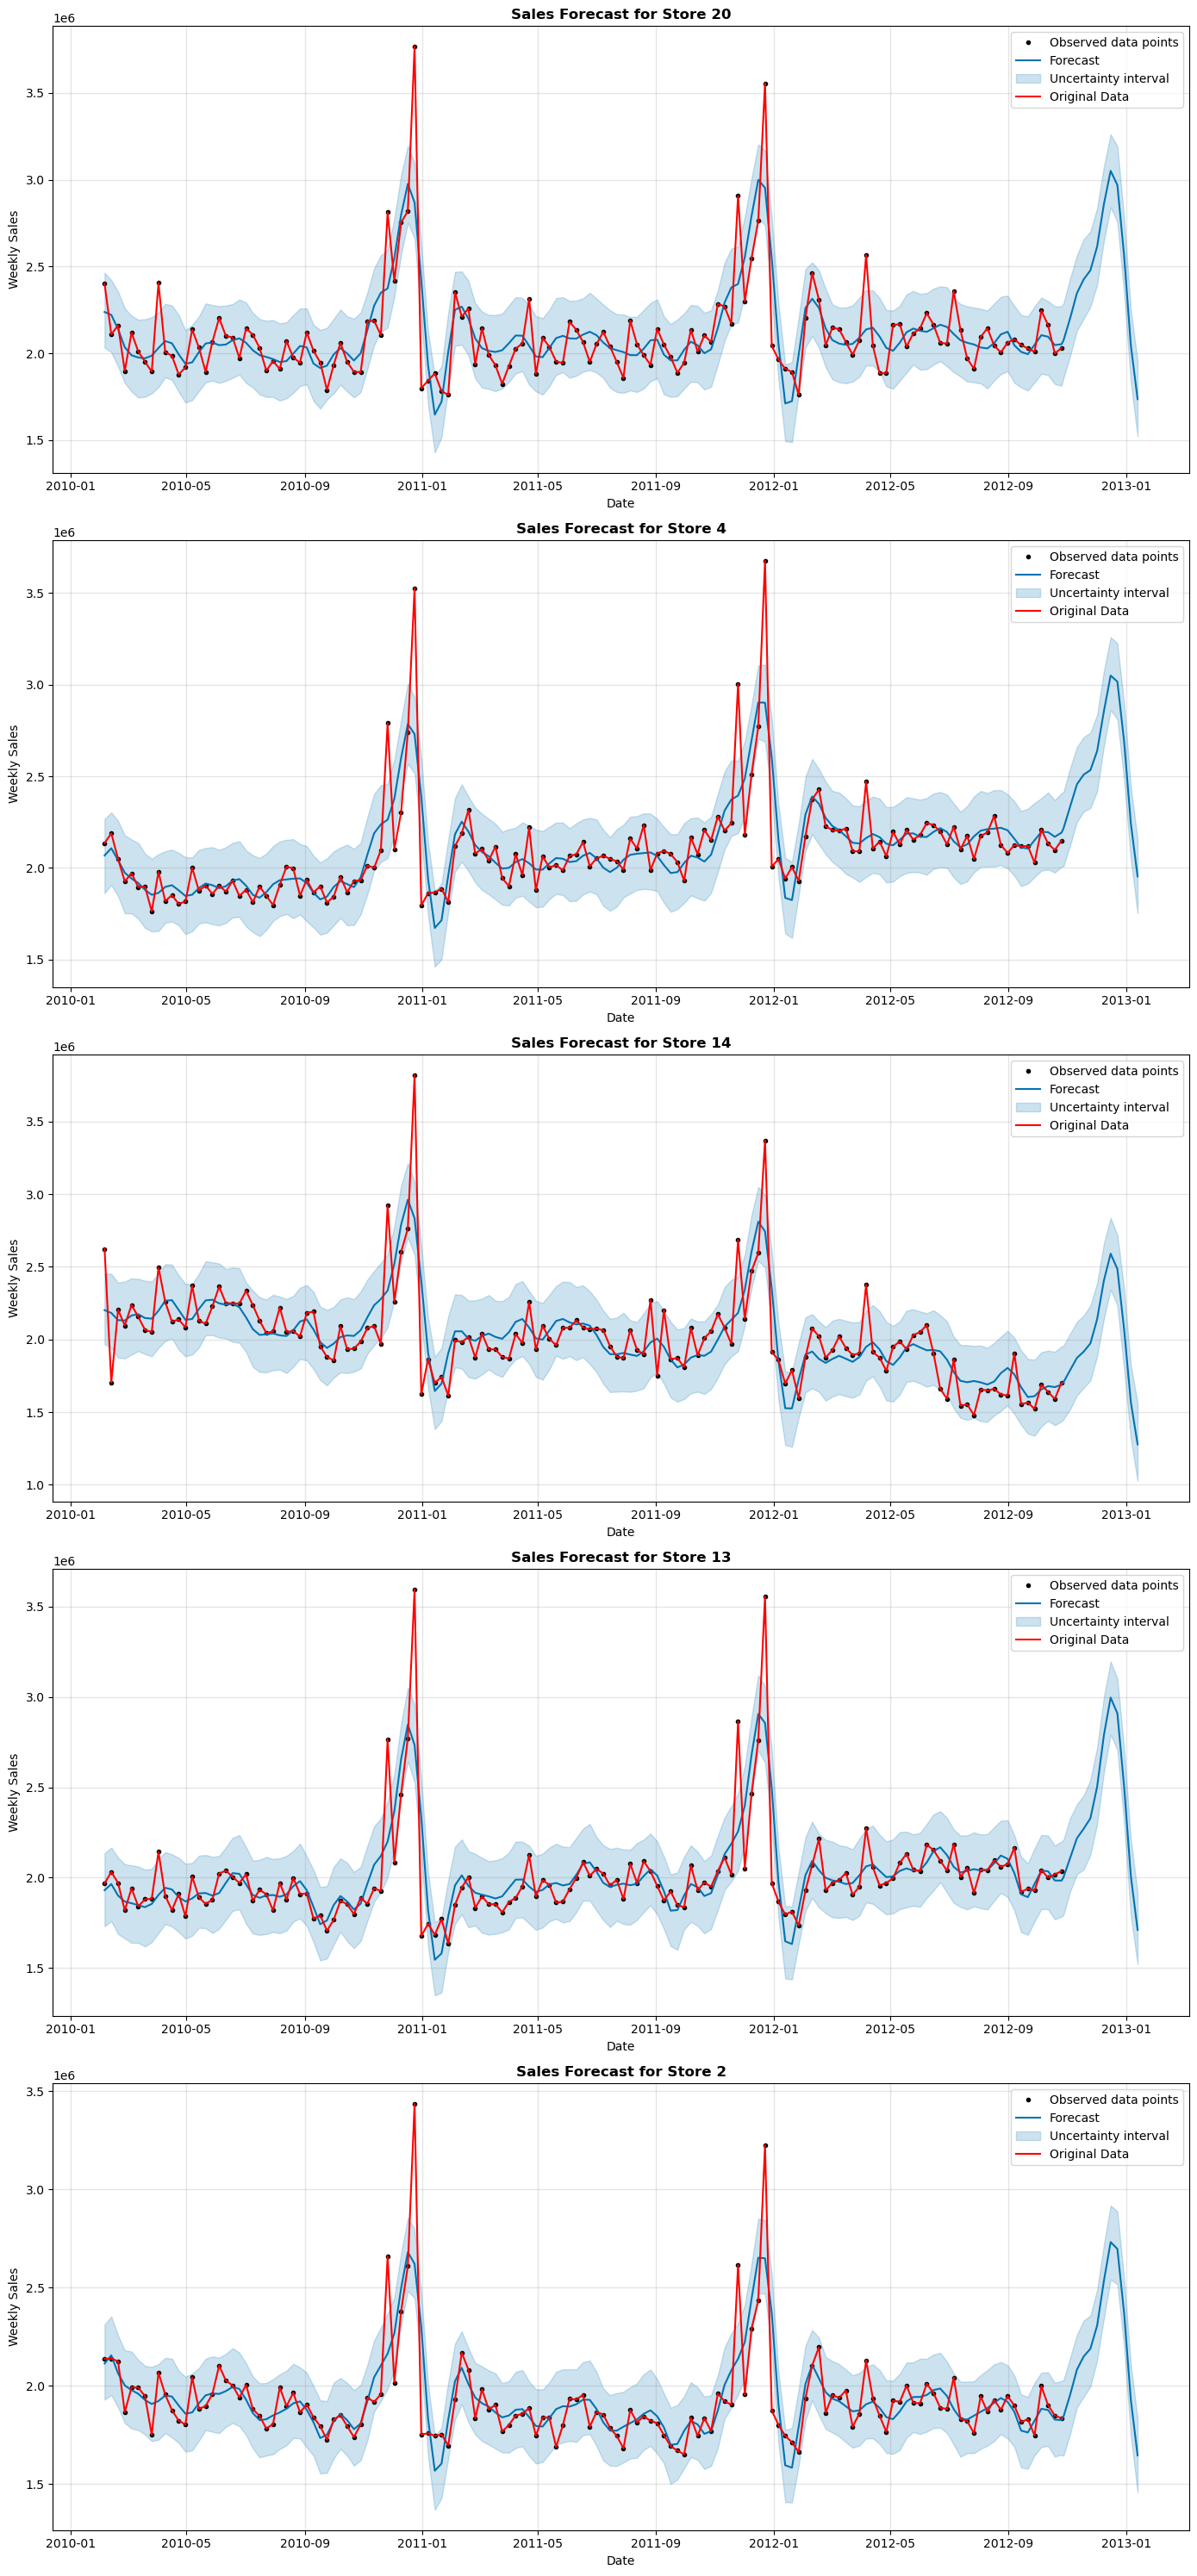

In [182]:
_ , axes = plt.subplots(5,1, figsize=(14,6*5))

for idx,i in enumerate(total_sales_sorted.head().index):
    model[i].plot(forecast[i], include_legend=True, xlabel='Date', ylabel='Weekly Sales', ax=axes[idx]);
    axes[idx].plot(model_store[i]['ds'], model_store[i]['y'], color='r', label='Original Data')
    axes[idx].set_title(f'Sales Forecast for Store {i}', fontweight='bold')
    axes[idx].legend()

plt.tight_layout()
plt.show()

**Let us plot the forecast for the 5 Worst performing stores**

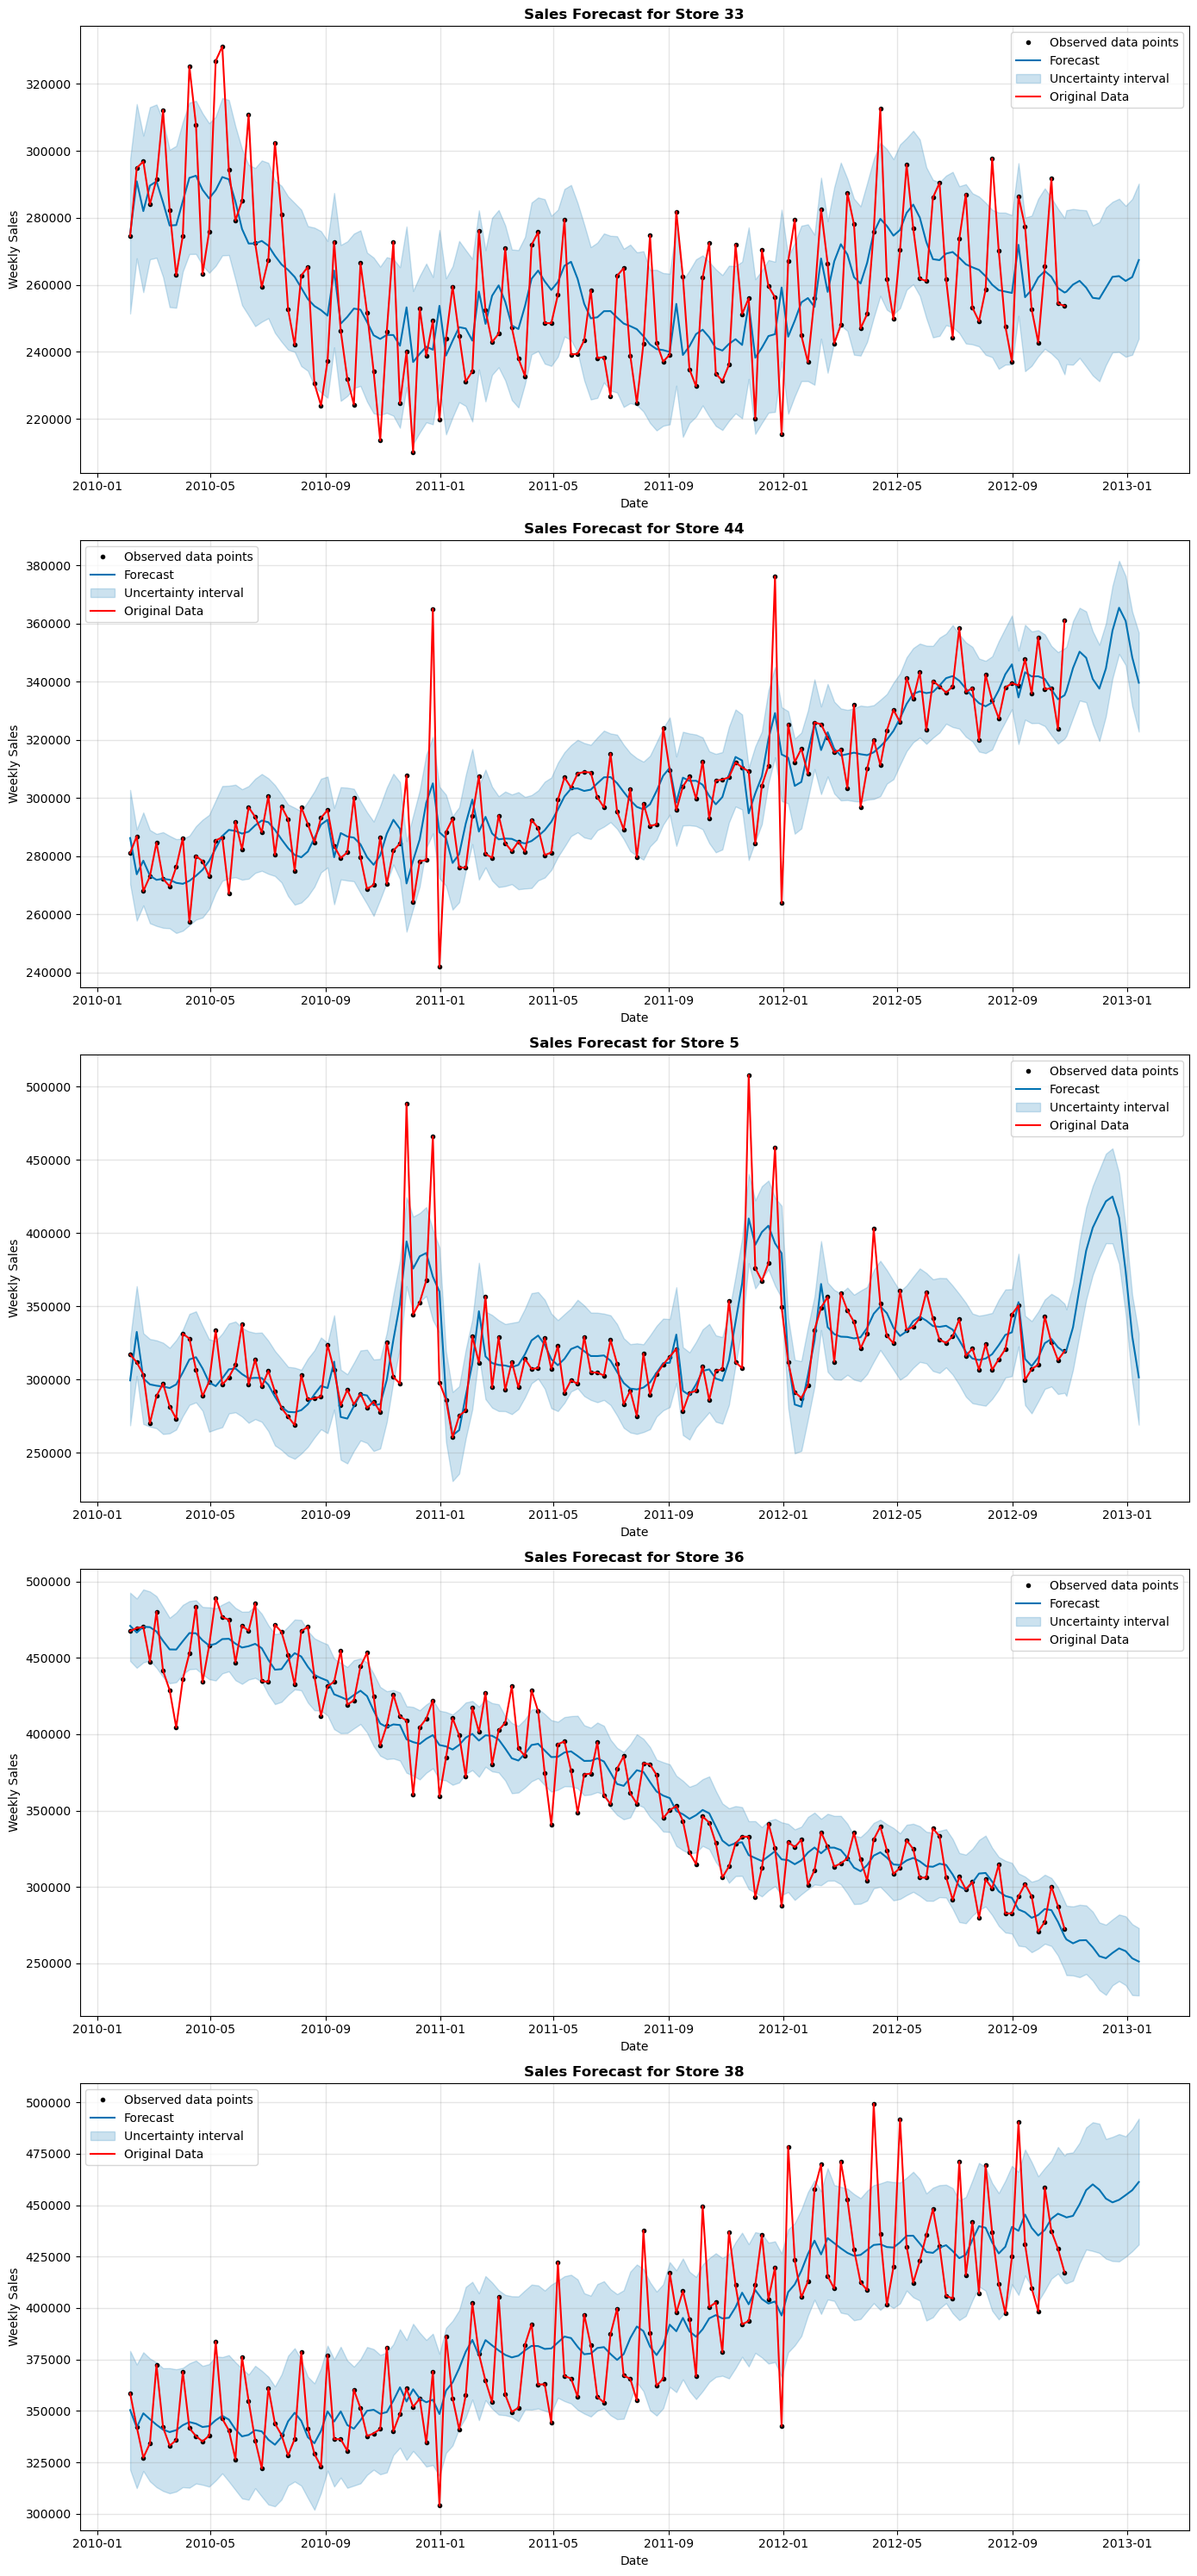

In [183]:
_ , axes = plt.subplots(5,1, figsize=(14, 6*5))

for idx,i in enumerate(total_sales_sorted.tail().index[::-1]):
    model[i].plot(forecast[i], include_legend=True, xlabel='Date', ylabel='Weekly Sales', ax=axes[idx]);
    axes[idx].plot(model_store[i]['ds'], model_store[i]['y'], color='r', label='Original Data')
    axes[idx].set_title(f'Sales Forecast for Store {i}', fontweight='bold')
    axes[idx].legend()

plt.tight_layout()
plt.show()

**Let us also visualze the components of the forcast for our top 3 performing stores:**

In [184]:
for i in total_sales_sorted.head(3).index:
    top3_forecast_components = plot_components_plotly(model[i], forecast[i], figsize=(1220,200))
    top3_forecast_components.update_layout(title_text=f'Forecast Components of Store {i}', title_font_size=18,title=dict(x=0.5))
    top3_forecast_components.show()

**Also visualizing the components of the forcast for our worst 3 performing stores:**

In [185]:
for i in total_sales_sorted.tail(3).index[::-1]:
    bottom3_forecast_components = plot_components_plotly(model[i], forecast[i], figsize=(1220,200))
    bottom3_forecast_components.update_layout(title_text=f'Forecast Components of Store {i}', title_font_size=18,title=dict(x=0.5))
    bottom3_forecast_components.show()

##### **Let us also forecast the Collective Sales Trends of all the stores by grouping and taking the mean value of weekly sales based on each dates**

**We'll also decompose its forecast componets and calculate its performance metrics**

In [186]:
# preparing data for prophet
mean_data = df[['Date','Weekly_Sales','Holiday_Flag']].groupby('Date').mean().reset_index().rename({'Date':'ds','Weekly_Sales':'y'},axis=1)
mean = mean_data[['ds','y']]
holidays = mean_data[mean_data['Holiday_Flag'] == 1][['ds']].assign(holiday='holiday_week')

In [187]:
# getting the forecast
mean_model = Prophet(holidays=holidays)
mean_model.fit(mean)
mean_future = mean_model.make_future_dataframe(periods=12,freq='W')
mean_forecast = mean_model.predict(mean_future)

**Forecasting for 12 weeks**

In [188]:
fig_forecast = plot_plotly(mean_model, mean_forecast, figsize=(1220, 700), xlabel='Date', ylabel='Weekly Sales')
fig_forecast.update_layout(title_text='Collective Sales Forecast (12 Weeks)', title_font_size=18, title=dict(x=0.5))
fig_forecast.show()

**Forecast components decomposed**

In [189]:
fig_forecast_components = plot_components_plotly(mean_model, mean_forecast, figsize=(1220, 200))
fig_forecast_components.update_layout(title_text='Components of Collective Sales Forecast', title_font_size=18, title=dict(x=0.5))
fig_forecast_components.show()

**Calculating the performance metrics for the above forecast**

In [190]:
mean_cv = cross_validation(mean_model, initial='366 days', horizon='52 days', period='7 days')
# initial='366 days': Specifies the initial training period, indicating the duration of historical data used for the initial model training. 
# I have taken it as 1 year keeping in mind the seasonality of this data is 1 year.
# horizon='52 days': Sets the forecast horizon, indicating the time into the future for which predictions are made.
# period='7 days': Defines the interval between successive cutoff dates for cross-validation, determining how frequently the model is retrained.
mean_perf = performance_metrics(mean_cv)
mean_perf

  0%|          | 0/83 [00:00<?, ?it/s]

horizon           mse          rmse           mae      mape     mdape  \
0  3 days  7.007393e+09  83710.171003  50714.722721  0.045831  0.029205   
1 10 days  6.353124e+09  79706.489635  51267.929204  0.046424  0.031738   
2 17 days  6.072199e+09  77924.312985  49206.375721  0.044483  0.032279   
3 24 days  5.896092e+09  76786.017595  48422.517875  0.043799  0.032299   
4 31 days  5.774880e+09  75992.629417  48115.094991  0.043528  0.032817   
5 38 days  5.472473e+09  73976.165242  47324.332404  0.042717  0.031772   
6 45 days  5.282623e+09  72681.652120  45244.084296  0.040642  0.029428   
7 52 days  5.433480e+09  73712.143079  45851.712875  0.041239  0.030246   

      smape  coverage  
0  0.046319  0.939759  
1  0.047203  0.903614  
2  0.045224  0.891566  
3  0.044545  0.891566  
4  0.044201  0.903614  
5  0.043507  0.891566  
6  0.041400  0.915663  
7  0.042063  0.915663

The above code initiates the cross-validation process. During cross-validation, the time series is split into training and testing sets multiple times. The function returns a dataframe containing predicted values and actual values. The performance_metrics function then uses this data to caluculate performance metrics based on the cross-validated predictions and actual values.

The above result summarizes the performance metrics for our time series forecasting model across various forecast horizons. The metrics include:

- **mse** (Mean Squared Error)
- **rmse** (Root Mean Squared Error)
- **mae** (Mean Absolute Error)
- **mape** (Mean Absolute Percentage Error)
- **mdape** (Median Absolute Percentage Error)
- **smape** (Symmetric Mean Absolute Percentage Error)
- **coverage** (Indicates the proportion of actual values falling within prediction intervals)

Across the forecast horizons, ranging from 3 to 52 days, the model shows a decrease in mse, rmse, mae, mape, mdape, and smape values, indicating improved predictive performance over longer time spans. Also The "coverage" metric that measures the proportion of actual values falling within prediction intervals, consistently increases. This suggests that the model's prediction intervals effectively capture the uncertainty in the forecasts. Overall, the table provides a comprehensive overview of the model's predictive capabilities across different forecasting horizons.

Let us also visualize one of these metrics in a plot

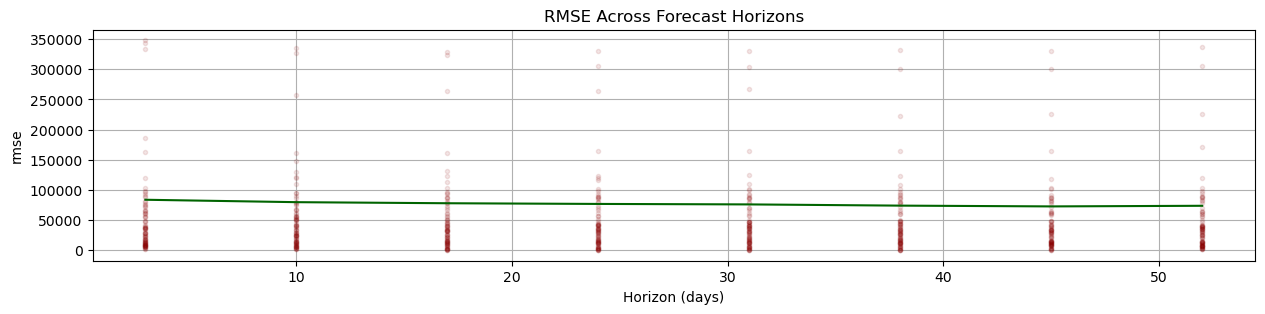

In [191]:
plot_cross_validation_metric(mean_cv, metric='rmse', figsize=(15,3), color='darkgreen', point_color='darkred');
plt.title('RMSE Across Forecast Horizons')
plt.show()

The above plot shows how the chosen metric (in this case, RMSE) evolves over the forecast horizon for each cross-validation fold. Each red dot on the plot corresponds to the RMSE value for a specific forecast horizon within a single cross-validation fold. The line going accross the dots represents the mean of the RMSE value and as we can see from the above plot, RMSE value here is decreasing over the forecast horizons.

#### **Creating a function to generate a 12-week sales forecast, its forecast components, and its performance metrics for any store number entered by the user**

Plotting the forecast...


Plotting the forecast components...


Getting the performance metrics...


  0%|          | 0/83 [00:00<?, ?it/s]

horizon           mse          rmse           mae      mape     mdape  \
0  3 days  8.327670e+09  91256.070932  64307.694433  0.063787  0.049331   
1 10 days  7.416495e+09  86119.072648  63169.237260  0.062679  0.044508   
2 17 days  7.351898e+09  85743.208429  60431.708627  0.059904  0.042950   
3 24 days  7.239109e+09  85082.953557  58752.659026  0.058056  0.038128   
4 31 days  7.023220e+09  83804.654598  58151.055640  0.057383  0.040699   
5 38 days  6.748004e+09  82146.235554  58021.007941  0.057107  0.041242   
6 45 days  6.618150e+09  81352.012370  56154.095422  0.054943  0.038508   
7 52 days  6.618628e+09  81354.952119  55788.412907  0.054630  0.041891   

      smape  coverage  
0  0.064558  0.819277  
1  0.063812  0.807229  
2  0.061041  0.807229  
3  0.059161  0.819277  
4  0.058342  0.831325  
5  0.058205  0.843373  
6  0.056032  0.831325  
7  0.055793  0.831325

Plotting error metric...


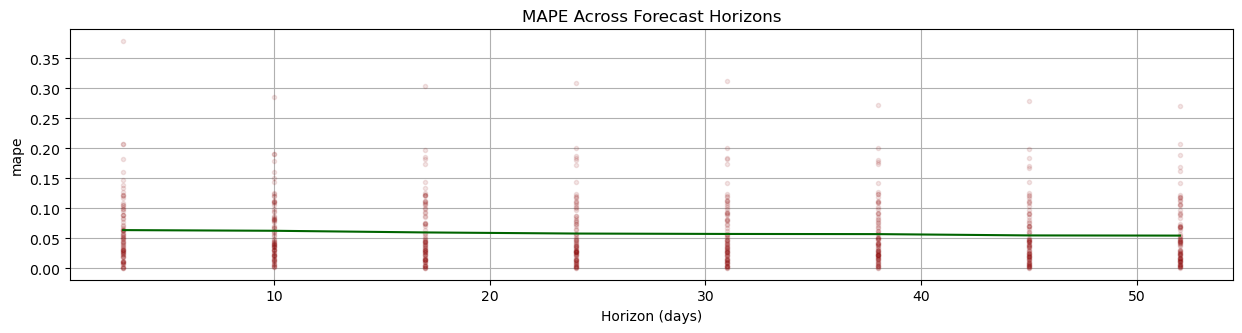

In [192]:
user_input = float(input("Enter a Store Number (1 - 45) for which you want to generate the forecast: "))

if (1 <= user_input <= 45) & (user_input % 1 == 0):
    str_num = int(user_input)

    def results(str_num, m=model[str_num], f=forecast[str_num]):
        print('Plotting the forecast...')
        fig_forecast = plot_plotly(m, f, figsize=(1220, 700), xlabel='Date', ylabel='Weekly Sales')
        fig_forecast.update_layout(title_text=f'Sales Forecast of Store {str_num}', title_font_size=18, title=dict(x=0.5))
        fig_forecast.show()

        print('Plotting the forecast components...')
        fig_forecast_components = plot_components_plotly(m, f, figsize=(1220, 200))
        fig_forecast_components.update_layout(title_text=f'Forecast Components of Store {str_num}', title_font_size=18, title=dict(x=0.5))
        fig_forecast_components.show()

        print('Getting the performance metrics...')
        result_model_cv = cross_validation(m, initial='366 days', horizon='52 days', period='7 days')
        result_model_perf = performance_metrics(result_model_cv)
        display(result_model_perf)

        print('Plotting error metric...')
        plot_cross_validation_metric(result_model_cv, metric='mape', figsize=(15,3.25), color='darkgreen', point_color='darkred');
        plt.title('MAPE Across Forecast Horizons')
        plt.show()
        
    results(str_num)

else:
    print("Invalid input. Enter a whole number between 1 - 45")

<center>  ------------------------------------------------------------------------------------------------------------------------------ </center>